### Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

[Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.
2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from statsmodels.stats.multicomp import MultiComparison 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#importing all the libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

#to ignore warnings for plots

In [3]:
df_sal = pd.read_csv('salarydata.csv')

#loading the salary dataset into the variable df_sal

In [4]:
df_sal.head()

#checking the first 5 rows of the dataset

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [5]:
df_sal

Education        Occupation  Salary
0    Doctorate      Adm-clerical  153197
1    Doctorate      Adm-clerical  115945
2    Doctorate      Adm-clerical  175935
3    Doctorate      Adm-clerical  220754
4    Doctorate             Sales  170769
5    Doctorate             Sales  219420
6    Doctorate             Sales  237920
7    Doctorate             Sales  160540
8    Doctorate             Sales  180934
9    Doctorate    Prof-specialty  248156
10   Doctorate    Prof-specialty  247724
11   Doctorate    Prof-specialty  249207
12   Doctorate    Prof-specialty  235334
13   Doctorate    Prof-specialty  248871
14   Doctorate    Prof-specialty  257345
15   Bachelors      Adm-clerical  160910
16   Bachelors      Adm-clerical  162494
17   Bachelors      Adm-clerical  188729
18   Bachelors    Prof-specialty   99185
19   Bachelors    Prof-specialty   90135
20   Bachelors    Prof-specialty  100135
21   Bachelors    Prof-specialty  133696
22   Bachelors             Sales  149909
23   Bachelors             Sales  191712
24   Bachelors             Sales  167431
25   Bachelors             Sales  260151
26     HS-grad             Sales   50103
27     HS-grad             Sales   50122
28     HS-grad             Sales   52242
29     HS-grad      Adm-clerical   75333
30     HS-grad      Adm-clerical   77743
31     HS-grad      Adm-clerical   83203
32     HS-grad    Prof-specialty   90456
33     HS-grad    Prof-specialty  100678
34     HS-grad    Prof-specialty   95469
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

In [6]:
print('Shape of the dataset is:',df_sal.shape)

#checking the shape of the dataset. As mentioned, salaries of 40 individuals are given

Shape of the dataset is: (40, 3)


In [7]:
df_sal.info()

#checking the datatypes of the 3 columns given
#also gives the no. of rows for each column which is 40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


There are 3 variables in the given dataset. Datatypes of 2 variables is object and the other one is numerical.
We have 1 dependent variable and 2 independent variables.

In the below step, we will change the datatype of 2 independent variables to categorical variables.

In [8]:
df_sal['Education'] = pd.Categorical(df_sal['Education'])
df_sal['Occupation'] = pd.Categorical(df_sal['Occupation'])

#changing Education and Occupation to categorical variables

In [9]:
df_sal.info()

#checking the info function to see the datatype of 2 independent variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 864.0 bytes


In [10]:
print('Below are the categories in Education variable: ')
print('\n')
print(df_sal.Education.value_counts())

#viewing all the categories and the number of individuals under each category in education variable

Below are the categories in Education variable: 


 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64


In [11]:
print('Below are the categories in Occupation variable: ')
print('\n')
print(df_sal.Occupation.value_counts())

#viewing all the categories and the number of individuals under each category in Occupation variable

Below are the categories in Occupation variable: 


 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64


### 1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

#### a) Variable: 'Education' 



Null hypothesis states that the mean salary for all categories of education are equal.

Alternative hypothesis states that there will be an effect of Education qualification on the Salary. The mean salary for atleast one level of educational qualification is unequal.

𝐻0 : 𝜇_salary_highschoolgraduate  =  𝜇_salary_bachelor  =  𝜇_salary_doctorate 
𝐻0 : The means of 'Salary' for the three education levels are equal.

𝐻1 : 𝜇_salary_highschoolgraduate  ≠  𝜇_salary_bachelor  =  𝜇_salary_doctorate  or  
𝐻1 : 𝜇_salary_highschoolgraduate  =  𝜇_salary_bachelor  ≠  𝜇_salary_doctorate  or  
𝐻1 : 𝜇_salary_highschoolgraduate  =  𝜇_salary_doctorate  ≠  𝜇_salary_bachelor  or  
𝐻1 : 𝜇_salary_highschoolgraduate  ≠  𝜇_salary_bachelor  ≠  𝜇_salary_graduate   

𝐻1 : Atleast one of the means of 'Salary' with respect to the various education levels is unequal.



#### b) Variable: 'Occupation'



Null hypothesis states that the mean salary for all categories of occupation are equal.

Alternative hypothesis states that there will be an effect on Salary with respect to the type of occupation. The mean salary for atleast one category of Occupation is unequal.

𝐻0 : 𝜇_sal_exec = 𝜇_sal_adm  =  𝜇_sal_sales  =  𝜇_sal_prof 
𝐻0 : The means of Salary between various occupations are equal

𝐻1 :  𝜇_sal_exec  ≠  𝜇_sal_adm  =  𝜇_sal_sales  =  𝜇_sal_prof  or  
𝐻1 :  𝜇_sal_exec  =  𝜇_sal_adm  ≠  𝜇_sal_sales  =  𝜇_sal_prof  or  
𝐻1 :  𝜇_sal_exec  =  𝜇_sal_sales  ≠  𝜇_sal_prof =  𝜇_sal_adm   or     
𝐻1 :  𝜇_sal_prof  ≠  𝜇_sal_exec  =  𝜇_sal_adm  =  𝜇_sal_sales  or   
𝐻1 :  𝜇_sal_exec  ≠  𝜇_sal_adm   ≠  𝜇_sal_sales  ≠  𝜇_sal_prof

𝐻1 : The means of Salary between various Occupations are unequal (Atleast one of the means between various Occupation is unequal)



### 2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

Level of signficance
𝛼  = 0.05

In [12]:
df_sal.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [13]:
print('mean of the variable Salary for all the 40 individuals: ',np.mean(df_sal.Salary))

#checking the overall mean for Salary variable

mean of the variable Salary for all the 40 individuals:  162186.875


In [14]:
print('Salary mean for all the categories under Education variable:')
df_sal.groupby('Education')['Salary'].mean()

#checking the mean for Bachelors, Doctorate and HS-grad under Education variable

Salary mean for all the categories under Education variable:


Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

In [15]:
#One way ANOVA on Salary with respect to Education

In [16]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df_sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN




We see that the p-value(1.257709e-08) is less than alpha (0.05). Thus, we Reject
 the Null Hypothesis
 (H0
). This means at least one particular category in the 'Education' variable has different mean of Salary as compared to the other categories.

Since p-value is less than 0.05, we have sufficient evidence to say that the mean salary across each category for education are not equal.



### 3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [17]:
print('mean of the variable Salary for all the 40 individuals: ',np.mean(df_sal.Salary))

#checking the overall mean for Salary variable

mean of the variable Salary for all the 40 individuals:  162186.875


In [18]:
print('Salary mean for all the categories under Occupation variable:')
df_sal.groupby('Occupation')['Salary'].mean()

#checking the mean for Adm-clerical, Exec-managerial, Prof-specialty and Sales under Occupation variable

Salary mean for all the categories under Occupation variable:


Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

In [19]:
#One way ANOVA on Salary with respect to Occupation

In [20]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df_sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


We see that the p-value(0.4585) is greater than alpha (0.05). Thus, we failed to Reject the Null Hypothesis (H0). Hence, mean salary for all categories of occupation are equal.

Since p-value is greater than 0.05, we have sufficient evidence to say that the mean salary across each category for occupation are equal.


### 4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

To find out which class means are significantly different, the Tukey Honest Significant Difference test is performed.
Null Hypothesis is rejected when one way ANOVA is conducted on Salary with respect to Education. 

Tukey Honest Significant Difference is performed below for Education variable to check which category means are significantly different.

In [21]:
tukey_sal = pairwise_tukeyhsd(endog=df_sal['Salary'],
                          groups=df_sal['Education'],
                          alpha=0.05)

In [22]:
print(tukey_sal)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7537.2745  79010.8589   True
 Bachelors    HS-grad  -90114.1556    0.0 -132039.7353 -48188.5758   True
 Doctorate    HS-grad -133388.2222    0.0 -174819.5736 -91956.8709   True
-------------------------------------------------------------------------


P-value for the difference in means between Bachelors and Doctorate : 0.0146

P-value for the difference in means between Bachelors and HS-grad : 0.001

P-value for the difference in means between Doctorate and HS-grad : 0.001

Thus, we can say that there is a statistically significant difference between the means of Bachelors and Doctorate; Bachelors and HS-grad and also Doctorate and HS-grad.

We can conclude that there is significant difference between the means for all the levels of Education.

### Problem 1B:

1. What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: Use Interaction_Plot function from statsmodel.graphics.factorplots module and give inference from the plot. ]
2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?
3. Explain the business implications of performing ANOVA for this particular case study.

In [23]:
df_sal.head(10)

Education       Occupation  Salary
0   Doctorate     Adm-clerical  153197
1   Doctorate     Adm-clerical  115945
2   Doctorate     Adm-clerical  175935
3   Doctorate     Adm-clerical  220754
4   Doctorate            Sales  170769
5   Doctorate            Sales  219420
6   Doctorate            Sales  237920
7   Doctorate            Sales  160540
8   Doctorate            Sales  180934
9   Doctorate   Prof-specialty  248156

### 1. What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: Use Interaction_Plot function from statsmodel.graphics.factorplots module and give inference from the plot. ]

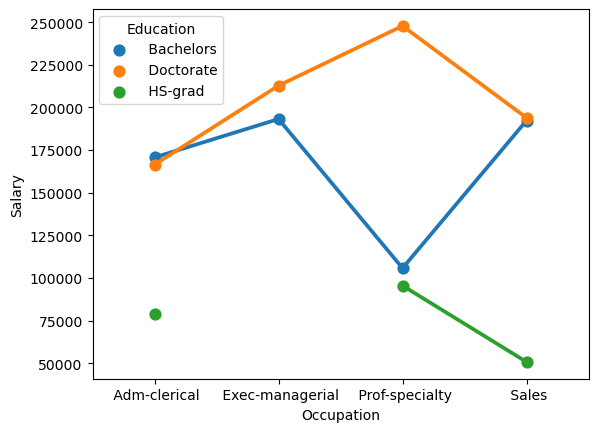

In [24]:
sns.pointplot(x='Occupation', y='Salary', hue='Education', data=df_sal, ci=None);

#way 1 using pointplot
#Interaction Plot for variables 'Education' and 'Occupation' in terms of Salary.

The above plot shows that there is significant amount of interaction between the categorical variables, Education and Occupation.

In [25]:
df_sal = pd.read_csv('salarydata.csv')
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


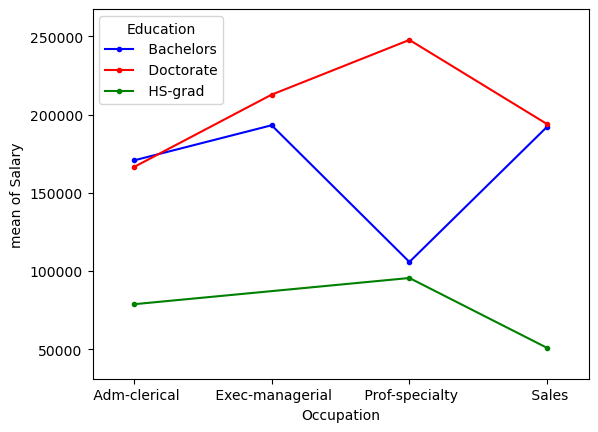

In [26]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df_sal['Occupation'], df_sal['Education'], df_sal['Salary'],
             colors=['blue','red','green'])

import matplotlib.pyplot as plt
plt.show()

#way 2 using interaction_plot
#Interaction Plot for variables 'Education' and 'Occupation' in terms of Salary.

The interaction plot shows that there is significant amount of interaction between the categorical variables, Education and Occupation.

From the interaction plot, we can say that:


1. People having HS-grad education level are not in the position of Exec-managerial and they are able to get only Adm-clerical, Sales and Prof-Specialty occupations
    
2. People who have a Doctorate and work as a Prof-specialty earn the highest salaries when compared to all other levels in both Education and Occupation.
    
3. People who have HS-grad education level and working in Sales earn the least salaries when compared to all other levels in both Education and Occupation.
    
4. As per the interaction, it is clear that people with education level as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries.
    
5. People with education as HS-Grad earn the minimum salaries in all the categories of Occupation.
    
6. When calculating the total salary of all categories in Occupation, people with education level as Doctorate tend to earn the maximum.
    
7. People with education as Bachelors and occupation as Sales earn higher than people with education as Bachelors and occupation Prof-Specialty. We see a 'v' curve for this.
    
8. People with education as Doctorate and occupation Sales earn lesser than people with Doctorate and occupation Prof-Specialty. We see a reverse 'v' curve in this part of the graph.
    

### 2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?


Null Hypothesis(H0): The effect of the independent variable ‘education’ on the mean ‘salary’ does not depend on the effect of the other independent variable ‘occupation’.
There is no interaction effect between the 2 independent variables, education and occupation.
    
Alternative Hypothesis(H1): There is an interaction effect between the independent variables ‘education’ and ‘occupation’ on the mean Salary.


In [27]:
#Two way annova with Education and Occupation along with Interaction effect

model = ols('Salary ~ Education+Occupation+Education*Occupation', data = df_sal).fit()
aov_table = sm.stats.anova_lm(model, type = 2)
print(aov_table)

                        df        sum_sq       mean_sq          F  \
Education              2.0  1.026955e+11  5.134773e+10  72.211958   
Occupation             3.0  5.519946e+09  1.839982e+09   2.587626   
Education:Occupation   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual              29.0  2.062102e+10  7.110697e+08        NaN   

                            PR(>F)  
Education             5.466264e-12  
Occupation            7.211580e-02  
Education:Occupation  2.232500e-05  
Residual                       NaN  


P-value for Education = 5.466264e-12 < 0.05

P-value for Occupation = 7.211580e-02 > 0.05

P-value for Interaction = 2.232500e-05 < 0.05


The P-value obtained from ANOVA for Education is statistically significant (P<0.05). The P-value obtained from ANOVA for Occupation is not statistically significant (P>0.05). 

Also the interaction effect using both Education and Occupation is statistically significant (P<0.05). 

We can conclude that Education significantly affect the Salary variable but not Occupation. However, Education and Occupation in interaction, significantly affect the Salary variable. 

For Education, atleast one of the means is different for all the categories with respect to Salary
For Occupation, means of Salary is same for all the categories
For interaction term, at least one of the means is different for the combination of Education and Occupation with respect to Salary.

### 3. Explain the business implications of performing ANOVA for this particular case study.

1. From ANOVA method, education individually has effect on Salary variable. Whereas Occupation individually doesn't effect the Salary variable.
2. From the ANOVA method and the interaction plot, we see that education combined with occupation results in higher and better salaries among the individuals. 
3. It is clear that individuals with education as Doctorate have maximum salaries and individuals with education as HS-grad earn the least salaries. 
4. Thus, we can conclude that Salary is dependent on educational qualifications and different occupations.

### Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?
2. Is scaling necessary for PCA in this case? Give justification and perform scaling.
3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].
4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]
5. Extract the eigenvalues and eigenvectors.
6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features
7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]
8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [28]:
df_edu = pd.read_csv('education_post12thstandard.csv')

#loading Education dataset into a variable df_edu

In [29]:
df_edu.head()

#checking the the first 5 rows of the dataset

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [30]:
print('Shape of the dataset is:',df_edu.shape)

#checking the shape of the dataset

Shape of the dataset is: (777, 18)


In [31]:
df_edu.dtypes

#checking the datatypes of the dataset

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [32]:
df_edu.info()

#checking the datatypes of the 3 columns given
#also gives the no. of rows for each column which is 777

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

There are 17 variables in the given dataset. Datatypes are object, int and float. All the columns are numerical except for the 'Names' variable

In [33]:
df_edu.describe().T

#Viewing the data summary of numeric features (.T just transposes the information and is done for better readability)
#describe function gives all the information such as mean, standard deviation, minimum value, maximum value,
#first quartile, median and third quartile

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [34]:
#get the summary of categorical features

df_edu.describe(include='all').T

count unique                           top freq          mean  \
Names          777    777  Abilene Christian University    1           NaN   
Apps         777.0    NaN                           NaN  NaN   3001.638353   
Accept       777.0    NaN                           NaN  NaN   2018.804376   
Enroll       777.0    NaN                           NaN  NaN    779.972973   
Top10perc    777.0    NaN                           NaN  NaN     27.558559   
Top25perc    777.0    NaN                           NaN  NaN     55.796654   
F.Undergrad  777.0    NaN                           NaN  NaN   3699.907336   
P.Undergrad  777.0    NaN                           NaN  NaN    855.298584   
Outstate     777.0    NaN                           NaN  NaN  10440.669241   
Room.Board   777.0    NaN                           NaN  NaN   4357.526384   
Books        777.0    NaN                           NaN  NaN    549.380952   
Personal     777.0    NaN                           NaN  NaN   1340.642214   
PhD          777.0    NaN                           NaN  NaN     72.660232   
Terminal     777.0    NaN                           NaN  NaN     79.702703   
S.F.Ratio    777.0    NaN                           NaN  NaN     14.089704   
perc.alumni  777.0    NaN                           NaN  NaN     22.743887   
Expend       777.0    NaN                           NaN  NaN   9660.171171   
Grad.Rate    777.0    NaN                           NaN  NaN      65.46332   

                     std     min     25%     50%      75%      max  
Names                NaN     NaN     NaN     NaN      NaN      NaN  
Apps         3870.201484    81.0   776.0  1558.0   3624.0  48094.0  
Accept       2451.113971    72.0   604.0  1110.0   2424.0  26330.0  
Enroll         929.17619    35.0   242.0   434.0    902.0   6392.0  
Top10perc      17.640364     1.0    15.0    23.0     35.0     96.0  
Top25perc      19.804778     9.0    41.0    54.0     69.0    100.0  
F.Undergrad  4850.420531   139.0   992.0  1707.0   4005.0  31643.0  
P.Undergrad  1522.431887     1.0    95.0   353.0    967.0  21836.0  
Outstate     4023.016484  2340.0  7320.0  9990.0  12925.0  21700.0  
Room.Board   1096.696416  1780.0  3597.0  4200.0   5050.0   8124.0  
Books          165.10536    96.0   470.0   500.0    600.0   2340.0  
Personal      677.071454   250.0   850.0  1200.0   1700.0   6800.0  
PhD            16.328155     8.0    62.0    75.0     85.0    103.0  
Terminal       14.722359    24.0    71.0    82.0     92.0    100.0  
S.F.Ratio       3.958349     2.5    11.5    13.6     16.5     39.8  
perc.alumni    12.391801     0.0    13.0    21.0     31.0     64.0  
Expend        5221.76844  3186.0  6751.0  8377.0  10830.0  56233.0  
Grad.Rate       17.17771    10.0    53.0    65.0     78.0    118.0

In [35]:
df_edu.isnull().sum()

#checking for missing values

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [36]:
df_edu.duplicated().sum()

0

In [37]:
df_edu.rename(columns={'F.Undergrad':'FUndergrad','P.Undergrad':'PUndergrad', 'Room.Board': 'RoomBoard', 
                   'S.F.Ratio':'SFRatio', 'perc.alumni':'percalumni', 'Grad.Rate':'GradRate'}, inplace=True)

In [38]:
df_edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   FUndergrad  PUndergrad  Outstate  RoomBoard  Books  Personal  PhD  \
0        2885         537      7440       3300    450      2200   70   
1        2683        1227     12280       6450    750      1500   29   
2        1036          99     11250       3750    400      1165   53   
3         510          63     12960       5450    450       875   92   
4         249         869      7560       4120    800      1500   76   

   Terminal  SFRatio  percalumni  Expend  GradRate  
0        78     18.1          12    7041        60  
1        30     12.2          16   10527        56  
2        66     12.9          30    8735        54  
3        97      7.7          37   19016        59  
4        72     11.9           2   10922        15


We have 777 transactions and 18 features captured for the same.

We observe that the column Names is the only variable which doesn't have numerical variables.

In all, we have 17 numeric features and 1 non-numeric.

There is no missing information in the dataset


### 1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [39]:
df_edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   FUndergrad  PUndergrad  Outstate  RoomBoard  Books  Personal  PhD  \
0        2885         537      7440       3300    450      2200   70   
1        2683        1227     12280       6450    750      1500   29   
2        1036          99     11250       3750    400      1165   53   
3         510          63     12960       5450    450       875   92   
4         249         869      7560       4120    800      1500   76   

   Terminal  SFRatio  percalumni  Expend  GradRate  
0        78     18.1          12    7041        60  
1        30     12.2          16   10527        56  
2        66     12.9          30    8735        54  
3        97      7.7          37   19016        59  
4        72     11.9           2   10922        15

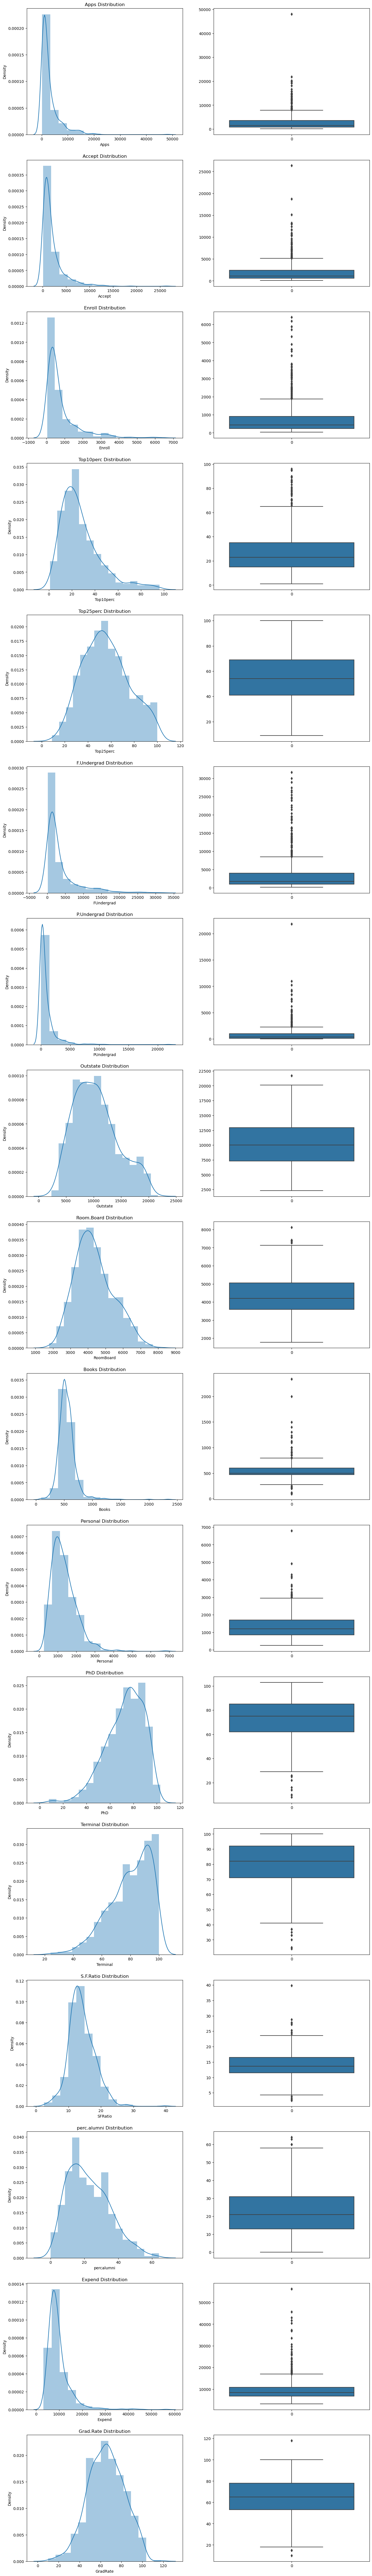

In [40]:
plt.figure(figsize=(16,120))
plt.subplot(17,2,1)
sns.distplot(df_edu.Apps,bins=15)
plt.title('Apps Distribution')

plt.subplot(17,2,2)
sns.boxplot(df_edu.Apps)
            
plt.subplot(17,2,3)
sns.distplot(df_edu.Accept,bins=15)
plt.title('Accept Distribution')

plt.subplot(17,2,4)
sns.boxplot(df_edu.Accept)

plt.subplot(17,2,5)
sns.distplot(df_edu.Enroll,bins=15)
plt.title('Enroll Distribution')

plt.subplot(17,2,6)
sns.boxplot(df_edu.Enroll)

plt.subplot(17,2,7)
sns.distplot(df_edu.Top10perc,bins=15)
plt.title('Top10perc Distribution')

plt.subplot(17,2,8)
sns.boxplot(df_edu.Top10perc)

plt.subplot(17,2,9)
sns.distplot(df_edu.Top25perc,bins=15)
plt.title('Top25perc Distribution')

plt.subplot(17,2,10)
sns.boxplot(df_edu.Top25perc)

plt.subplot(17,2,11)
sns.distplot(df_edu.FUndergrad,bins=15)
plt.title('F.Undergrad Distribution')

plt.subplot(17,2,12)
sns.boxplot(df_edu.FUndergrad)

plt.subplot(17,2,13)
sns.distplot(df_edu.PUndergrad,bins=15)
plt.title('P.Undergrad Distribution')

plt.subplot(17,2,14)
sns.boxplot(df_edu.PUndergrad)

plt.subplot(17,2,15)
sns.distplot(df_edu.Outstate,bins=15)
plt.title('Outstate Distribution')

plt.subplot(17,2,16)
sns.boxplot(df_edu.Outstate)

plt.subplot(17,2,17)
sns.distplot(df_edu.RoomBoard,bins=15)
plt.title('Room.Board Distribution')

plt.subplot(17,2,18)
sns.boxplot(df_edu.RoomBoard)

plt.subplot(17,2,19)
sns.distplot(df_edu.Books,bins=15)
plt.title('Books Distribution')

plt.subplot(17,2,20)
sns.boxplot(df_edu.Books)

plt.subplot(17,2,21)
sns.distplot(df_edu.Personal,bins=15)
plt.title('Personal Distribution')

plt.subplot(17,2,22)
sns.boxplot(df_edu.Personal)

plt.subplot(17,2,23)
sns.distplot(df_edu.PhD,bins=15)
plt.title('PhD Distribution')

plt.subplot(17,2,24)
sns.boxplot(df_edu.PhD)

plt.subplot(17,2,25)
sns.distplot(df_edu.Terminal,bins=15)
plt.title('Terminal Distribution')

plt.subplot(17,2,26)
sns.boxplot(df_edu.Terminal)

plt.subplot(17,2,27)
sns.distplot(df_edu.SFRatio,bins=15)
plt.title('S.F.Ratio Distribution')

plt.subplot(17,2,28)
sns.boxplot(df_edu.SFRatio)

plt.subplot(17,2,29)
sns.distplot(df_edu.percalumni,bins=15)
plt.title('perc.alumni Distribution')

plt.subplot(17,2,30)
sns.boxplot(df_edu.percalumni)

plt.subplot(17,2,31)
sns.distplot(df_edu.Expend,bins=15)
plt.title('Expend Distribution')

plt.subplot(17,2,32)
sns.boxplot(df_edu.Expend)

plt.subplot(17,2,33)
sns.distplot(df_edu.GradRate,bins=15)
plt.title('Grad.Rate Distribution');

plt.subplot(17,2,34)
sns.boxplot(df_edu.GradRate);


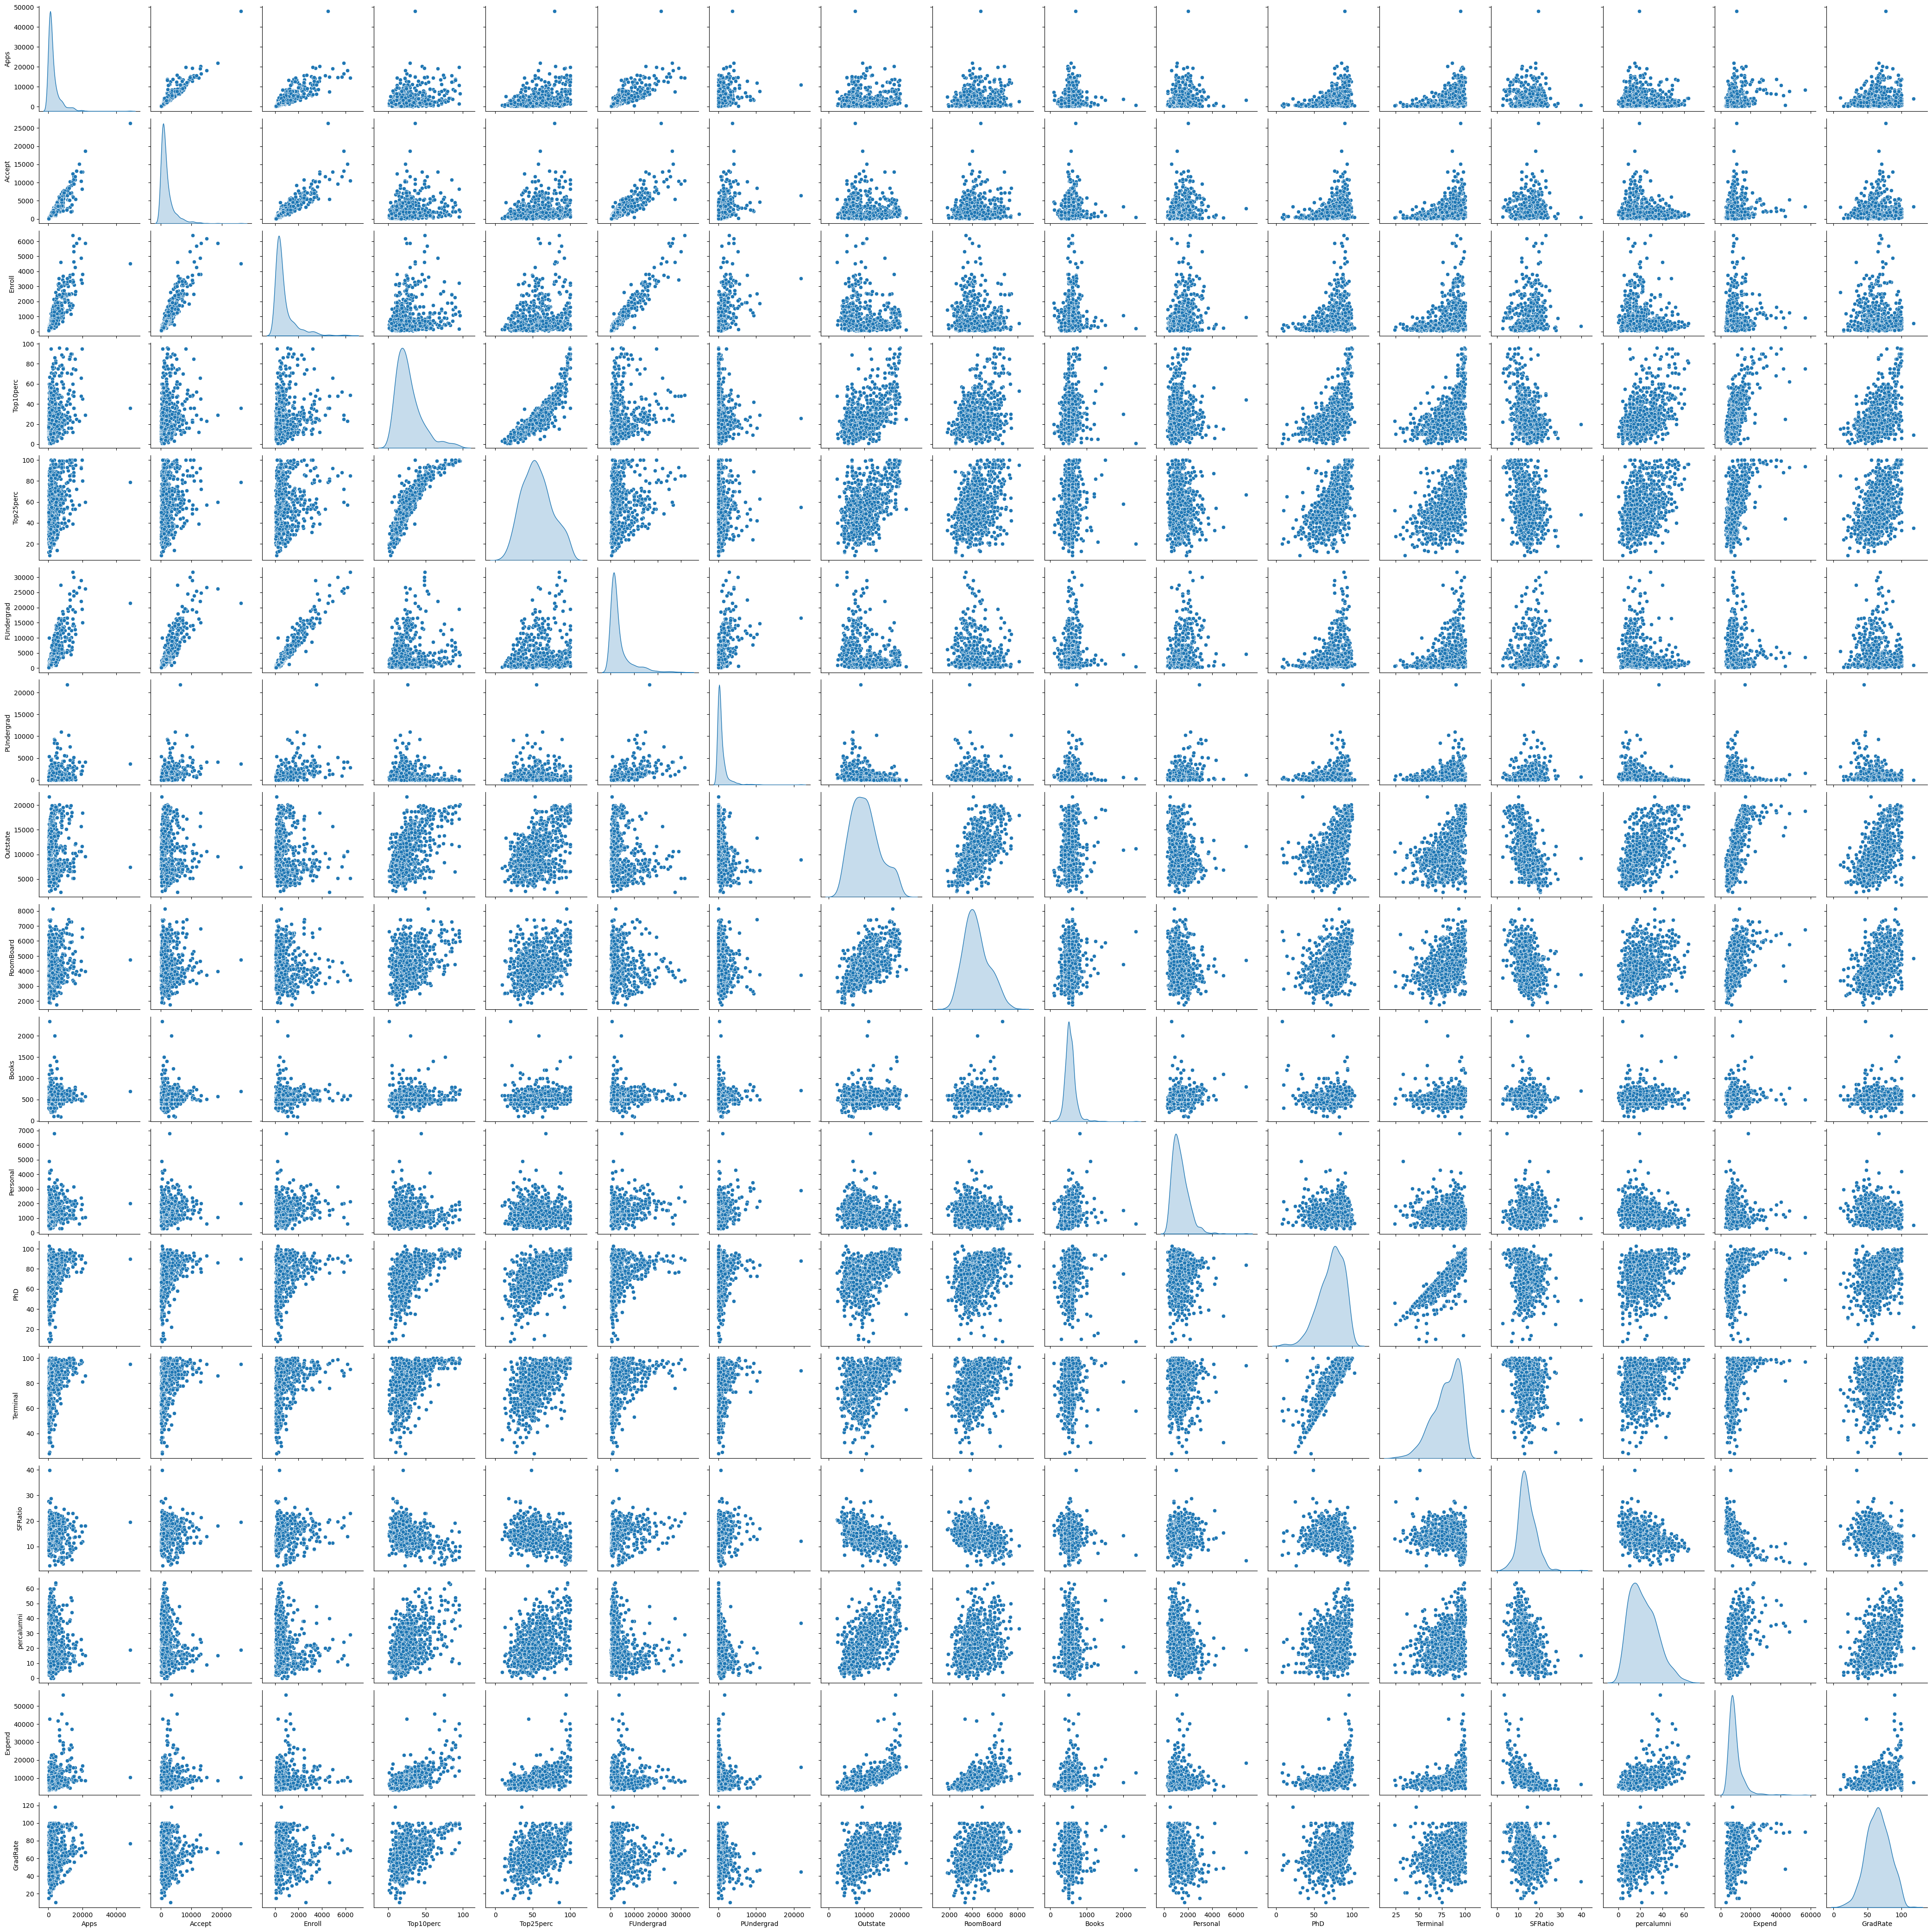

In [41]:
sns.pairplot(df_edu, diag_kind='kde');



Above pair plot helps us to understand the relationship between all the numerical values in the dataset. By comparing all the variables, we can understand the patterns in the data.


In [42]:
df_edu_co = df_edu.corr()
df_edu_co

Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  \
Apps        1.000000  0.943451  0.846822   0.338834   0.351640    0.814491   
Accept      0.943451  1.000000  0.911637   0.192447   0.247476    0.874223   
Enroll      0.846822  0.911637  1.000000   0.181294   0.226745    0.964640   
Top10perc   0.338834  0.192447  0.181294   1.000000   0.891995    0.141289   
Top25perc   0.351640  0.247476  0.226745   0.891995   1.000000    0.199445   
FUndergrad  0.814491  0.874223  0.964640   0.141289   0.199445    1.000000   
PUndergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577    0.570512   
Outstate    0.050159 -0.025755 -0.155477   0.562331   0.489394   -0.215742   
RoomBoard   0.164939  0.090899 -0.040232   0.371480   0.331490   -0.068890   
Books       0.132559  0.113525  0.112711   0.118858   0.115527    0.115550   
Personal    0.178731  0.200989  0.280929  -0.093316  -0.080810    0.317200   
PhD         0.390697  0.355758  0.331469   0.531828   0.545862    0.318337   
Terminal    0.369491  0.337583  0.308274   0.491135   0.524749    0.300019   
SFRatio     0.095633  0.176229  0.237271  -0.384875  -0.294629    0.279703   
percalumni -0.090226 -0.159990 -0.180794   0.455485   0.417864   -0.229462   
Expend      0.259592  0.124717  0.064169   0.660913   0.527447    0.018652   
GradRate    0.146755  0.067313 -0.022341   0.494989   0.477281   -0.078773   

            PUndergrad  Outstate  RoomBoard     Books  Personal       PhD  \
Apps          0.398264  0.050159   0.164939  0.132559  0.178731  0.390697   
Accept        0.441271 -0.025755   0.090899  0.113525  0.200989  0.355758   
Enroll        0.513069 -0.155477  -0.040232  0.112711  0.280929  0.331469   
Top10perc    -0.105356  0.562331   0.371480  0.118858 -0.093316  0.531828   
Top25perc    -0.053577  0.489394   0.331490  0.115527 -0.080810  0.545862   
FUndergrad    0.570512 -0.215742  -0.068890  0.115550  0.317200  0.318337   
PUndergrad    1.000000 -0.253512  -0.061326  0.081200  0.319882  0.149114   
Outstate     -0.253512  1.000000   0.654256  0.038855 -0.299087  0.382982   
RoomBoard    -0.061326  0.654256   1.000000  0.127963 -0.199428  0.329202   
Books         0.081200  0.038855   0.127963  1.000000  0.179295  0.026906   
Personal      0.319882 -0.299087  -0.199428  0.179295  1.000000 -0.010936   
PhD           0.149114  0.382982   0.329202  0.026906 -0.010936  1.000000   
Terminal      0.141904  0.407983   0.374540  0.099955 -0.030613  0.849587   
SFRatio       0.232531 -0.554821  -0.362628 -0.031929  0.136345 -0.130530   
percalumni   -0.280792  0.566262   0.272363 -0.040208 -0.285968  0.249009   
Expend       -0.083568  0.672779   0.501739  0.112409 -0.097892  0.432762   
GradRate     -0.257001  0.571290   0.424942  0.001061 -0.269344  0.305038   

            Terminal   SFRatio  percalumni    Expend  GradRate  
Apps        0.369491  0.095633   -0.090226  0.259592  0.146755  
Accept      0.337583  0.176229   -0.159990  0.124717  0.067313  
Enroll      0.308274  0.237271   -0.180794  0.064169 -0.022341  
Top10perc   0.491135 -0.384875    0.455485  0.660913  0.494989  
Top25perc   0.524749 -0.294629    0.417864  0.527447  0.477281  
FUndergrad  0.300019  0.279703   -0.229462  0.018652 -0.078773  
PUndergrad  0.141904  0.232531   -0.280792 -0.083568 -0.257001  
Outstate    0.407983 -0.554821    0.566262  0.672779  0.571290  
RoomBoard   0.374540 -0.362628    0.272363  0.501739  0.424942  
Books       0.099955 -0.031929   -0.040208  0.112409  0.001061  
Personal   -0.030613  0.136345   -0.285968 -0.097892 -0.269344  
PhD         0.849587 -0.130530    0.249009  0.432762  0.305038  
Terminal    1.000000 -0.160104    0.267130  0.438799  0.289527  
SFRatio    -0.160104  1.000000   -0.402929 -0.583832 -0.306710  
percalumni  0.267130 -0.402929    1.000000  0.417712  0.490898  
Expend      0.438799 -0.583832    0.417712  1.000000  0.390343  
GradRate    0.289527 -0.306710    0.490898  0.390343  1.000000

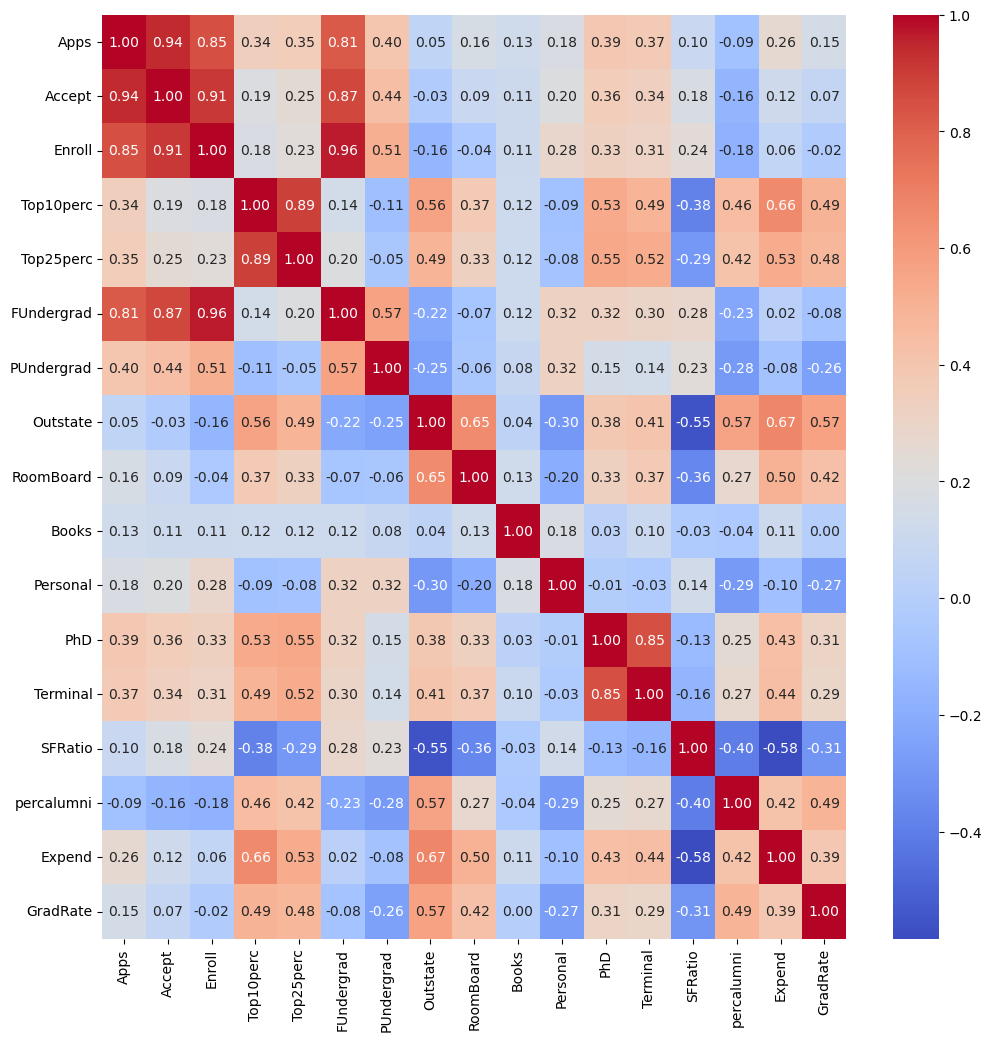

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(df_edu_co, annot=True, fmt ='.2f', cmap='coolwarm');

Above heatmap gives us the correlation between two numerical variables.

Application variable is highly positively correlated with application accepted, students enrolled and full time graduates. We can get some information on this when a student submits application and it is accepted and also whether the student is enrolled as a full time graduate.

There is a negative correlation between application and percentage of alumni. We can conclude that not all students who enrolled into the college are part of the alumni of college.

The application with top 10,25 of higher secondary class, outstate, room board, books, personal, PhD, terminal, S.F Ratio, expenditure, graduation ratio are positively correlated.
 


### 2. Is scaling necessary for PCA in this case? Give justification and perform scaling.


In [44]:
df_edu_dropped = df_edu.drop(['Names'], axis =1)

#dropping Names column as it is not a numerical variable

In [45]:
df_edu_dropped.head()

Apps  Accept  Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0  1660    1232     721         23         52        2885         537   
1  2186    1924     512         16         29        2683        1227   
2  1428    1097     336         22         50        1036          99   
3   417     349     137         60         89         510          63   
4   193     146      55         16         44         249         869   

   Outstate  RoomBoard  Books  Personal  PhD  Terminal  SFRatio  percalumni  \
0      7440       3300    450      2200   70        78     18.1          12   
1     12280       6450    750      1500   29        30     12.2          16   
2     11250       3750    400      1165   53        66     12.9          30   
3     12960       5450    450       875   92        97      7.7          37   
4      7560       4120    800      1500   76        72     11.9           2   

   Expend  GradRate  
0    7041        60  
1   10527        56  
2    8735        54  
3   19016        59  
4   10922        15

Below scaling is performed after dropping the ‘Names’ variable as it is a categorical variable. Dataset with only numerical values is used.

The dataset contains 17 numerical columns with different scales.
Application, accepted application, enrolled full time graduates, part time graduates, outstate: There variables represent number of students.
Top10 percent and Top25 percent are given in percentages.
Room board, books, personal: These variables represent cost/money
PhD, sf ratio, percentage of alumni, graduation rate: Represent percentage values
As per the above inferences, some of the variables have different scales.
Hence, scaling is necessary for PCA in this case.

Using z-score to scale the variables in the data. Z-score gives us how many standard deviation the point is away from the mean. Below is the scaled data:


In [46]:
from scipy.stats import zscore
df_edu_scaled = df_edu_dropped.apply(zscore)
df_edu_scaled.head()

#using z-score to scale the variables in the data

Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827   -0.168116   -0.209207   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911   -0.209788    0.244307   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878   -0.549565   -0.497090   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612   -0.658079   -0.520752   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031   -0.711924    0.009005   

   Outstate  RoomBoard     Books  Personal       PhD  Terminal   SFRatio  \
0 -0.746356  -0.964905 -0.602312  1.270045 -0.163028 -0.115729  1.013776   
1  0.457496   1.909208  1.215880  0.235515 -2.675646 -3.378176 -0.477704   
2  0.201305  -0.554317 -0.905344 -0.259582 -1.204845 -0.931341 -0.300749   
3  0.626633   0.996791 -0.602312 -0.688173  1.185206  1.175657 -1.615274   
4 -0.716508  -0.216723  1.518912  0.235515  0.204672 -0.523535 -0.553542   

   percalumni    Expend  GradRate  
0   -0.867574 -0.501910 -0.318252  
1   -0.544572  0.166110 -0.551262  
2    0.585935 -0.177290 -0.667767  
3    1.151188  1.792851 -0.376504  
4   -1.675079  0.241803 -2.939613

In [47]:
df_edu_scaled.T

0         1         2         3         4         5    \
Apps       -0.346882 -0.210884 -0.406866 -0.668261 -0.726176 -0.624307   
Accept     -0.321205 -0.038703 -0.376318 -0.681682 -0.764555 -0.628611   
Enroll     -0.063509 -0.288584 -0.478121 -0.692427 -0.780735 -0.669812   
Top10perc  -0.258583 -0.655656 -0.315307  1.840231 -0.655656  0.592287   
Top25perc  -0.191827 -1.353911 -0.292878  1.677612 -0.596031  0.313426   
FUndergrad -0.168116 -0.209788 -0.549565 -0.658079 -0.711924 -0.623421   
PUndergrad -0.209207  0.244307 -0.497090 -0.520752  0.009005 -0.535212   
Outstate   -0.746356  0.457496  0.201305  0.626633 -0.716508  0.760947   
RoomBoard  -0.964905  1.909208 -0.554317  0.996791 -0.216723 -0.932970   
Books      -0.602312  1.215880 -0.905344 -0.602312  1.518912 -0.299280   
Personal    1.270045  0.235515 -0.259582 -0.688173  0.235515 -0.983753   
PhD        -0.163028 -2.675646 -1.204845  1.185206  0.204672 -0.346878   
Terminal   -0.115729 -3.378176 -0.931341  1.175657 -0.523535 -0.455567   
SFRatio     1.013776 -0.477704 -0.300749 -1.615274 -0.553542 -1.185526   
percalumni -0.867574 -0.544572  0.585935  1.151188 -1.675079 -0.948325   
Expend     -0.501910  0.166110 -0.177290  1.792851  0.241803  0.012806   
GradRate   -0.318252 -0.551262 -0.667767 -0.376504 -2.939613 -0.609514   

                 6         7         8         9    ...       767       768  \
Apps       -0.684808 -0.285088 -0.507700 -0.625600  ... -0.176238 -0.736777   
Accept     -0.685356 -0.121984 -0.481644 -0.620854  ... -0.087284 -0.771903   
Enroll     -0.729043 -0.313353 -0.595505 -0.654735  ... -0.011817 -0.759196   
Top10perc  -0.598931  0.535563  0.138490 -0.372032  ... -0.201858 -0.598931   
Top25perc  -0.545505  0.616579  0.363952 -0.596031  ...  0.262901 -0.747607   
FUndergrad -0.677472 -0.434450 -0.562562 -0.598459  ... -0.062903 -0.705116   
PUndergrad -0.410988 -0.541127 -0.361036 -0.510893  ... -0.121791 -0.547700   
Outstate    0.708713  0.852479  1.282036  0.006798  ... -1.005035 -0.333464   
RoomBoard   1.243144  0.427443  0.038754 -0.891911  ... -0.880962 -0.599938   
Books      -0.299280 -0.602312 -1.511408  0.670422  ...  0.185571 -0.299280   
Personal    0.235515 -0.725120 -1.242385  0.678885  ...  1.196150  0.087725   
PhD         1.062639  1.001356  0.388522 -2.001529  ... -0.101745 -1.511262   
Terminal    0.903786  1.379560  0.292077 -2.630532  ...  0.020207 -2.154758   
SFRatio    -0.654660 -0.098515 -0.705218 -0.654660  ... -0.326029 -1.413040   
percalumni  0.262933  1.151188  0.020681 -0.625323  ...  0.262933  0.262933   
Expend     -0.153145  0.350074  0.380160 -0.128233  ... -0.561698 -0.134173   
GradRate   -0.143495  0.439030  0.846798 -0.784272  ... -0.376504 -0.900777   

                 769       770       771       772       773       774  \
Apps       -0.264404 -0.387991 -0.060407 -0.208040 -0.269575 -0.233895   
Accept     -0.114227 -0.442453  0.120511 -0.205673 -0.087284 -0.042377   
Enroll     -0.220739 -0.545967 -0.105509 -0.255200 -0.091509 -0.091509   
Top10perc   0.819186  1.329708  1.216259 -1.336352 -0.201858  0.365389   
Top25perc   0.616579  1.374460  1.526036 -1.505488 -0.444454  0.262901   
FUndergrad -0.354818 -0.544820 -0.185239 -0.126030 -0.175543 -0.187095   
PUndergrad -0.467513 -0.539812 -0.505635  0.771435  0.165435 -0.453053   
Outstate    1.369837  0.556988  1.353919 -0.906289  0.268462 -0.880670   
RoomBoard   0.042403 -0.189351  0.923798 -0.417455  0.549707 -0.143730   
Books      -0.905344  0.337087 -0.117461 -0.299280  0.306784  0.409815   
Personal   -0.799015  0.146841 -0.902468 -0.207855 -0.133960 -0.827095   
PhD         0.572372  1.123923  1.185206 -0.775861  0.020822 -0.346878   
Terminal    1.039721  0.835818  0.971754 -1.339146 -0.319632 -0.319632   
SFRatio    -0.326029  0.305955  0.280675  1.746877 -0.199632  0.078441   
percalumni  0.505184  1.554941  0.908937 -0.706073  0.666685 -0.221570   
Expend      0.144456 -0.342091  0.213442 -0.994781 -0.090290 -0.256241   
Gra

In [48]:
df_edu_scaled.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   3.657878e-17  5.486816e-17 -5.486816e-17 -4.115112e-17 -1.554598e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.551337e-01 -7.947645e-01 -8.022728e-01 -1.506526e+00 -2.364419e+00   
25%   -5.754408e-01 -5.775805e-01 -5.793514e-01 -7.123803e-01 -7.476067e-01   
50%   -3.732540e-01 -3.710108e-01 -3.725836e-01 -2.585828e-01 -9.077663e-02   
75%    1.609122e-01  1.654173e-01  1.314128e-01  4.221134e-01  6.671042e-01   
max    1.165867e+01  9.924816e+00  6.043678e+00  3.882319e+00  2.233391e+00   

         FUndergrad  PUndergrad      Outstate     RoomBoard         Books  \
count  7.770000e+02  777.000000  7.770000e+02  7.770000e+02  7.770000e+02   
mean   1.828939e-17    0.000000  1.554598e-16  3.474984e-16 -1.760354e-16   
std    1.000644e+00    1.000644  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.346169e-01   -0.561502 -2.014878e+00 -2.351778e+00 -2.747779e+00   
25%   -5.586426e-01   -0.499719 -7.762035e-01 -6.939170e-01 -4.810994e-01   
50%   -4.111378e-01   -0.330144 -1.120949e-01 -1.437297e-01 -2.992802e-01   
75%    6.294077e-02    0.073418  6.179271e-01  6.318245e-01  3.067838e-01   
max    5.764674e+00   13.789921  2.800531e+00  3.436593e+00  1.085230e+01   

           Personal           PhD      Terminal       SFRatio    percalumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   4.572347e-17  4.572347e-17 -4.115112e-16 -6.401286e-17  9.144694e-18   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.611860e+00 -3.962596e+00 -3.785982e+00 -2.929799e+00 -1.836580e+00   
25%   -7.251203e-01 -6.532948e-01 -5.915023e-01 -6.546598e-01 -7.868237e-01   
50%   -2.078552e-01  1.433889e-01  1.561419e-01 -1.237939e-01 -1.408197e-01   
75%    5.310950e-01  7.562224e-01  8.358184e-01  6.093067e-01  6.666852e-01   
max    8.068387e+00  1.859323e+00  1.379560e+00  6.499390e+00  3.331452e+00   

             Expend      GradRate  
count  7.770000e+02  7.770000e+02  
mean   1.325981e-16  3.612154e-16  
std    1.000644e+00  1.000644e+00  
min   -1.240641e+00 -3.230876e+00  
25%   -5.574826e-01 -7.260193e-01  
50%   -2.458933e-01 -2.698956e-02  
75%    2.241735e-01  7.302926e-01  
max    8.924721e+00  3.060392e+00

### 3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

In [49]:
cov_matrix = np.cov(df_edu_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

#printing covariance matrix using the scaled data

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [50]:
df_edu_scaled.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  \
Apps        1.000000  0.943451  0.846822   0.338834   0.351640    0.814491   
Accept      0.943451  1.000000  0.911637   0.192447   0.247476    0.874223   
Enroll      0.846822  0.911637  1.000000   0.181294   0.226745    0.964640   
Top10perc   0.338834  0.192447  0.181294   1.000000   0.891995    0.141289   
Top25perc   0.351640  0.247476  0.226745   0.891995   1.000000    0.199445   
FUndergrad  0.814491  0.874223  0.964640   0.141289   0.199445    1.000000   
PUndergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577    0.570512   
Outstate    0.050159 -0.025755 -0.155477   0.562331   0.489394   -0.215742   
RoomBoard   0.164939  0.090899 -0.040232   0.371480   0.331490   -0.068890   
Books       0.132559  0.113525  0.112711   0.118858   0.115527    0.115550   
Personal    0.178731  0.200989  0.280929  -0.093316  -0.080810    0.317200   
PhD         0.390697  0.355758  0.331469   0.531828   0.545862    0.318337   
Terminal    0.369491  0.337583  0.308274   0.491135   0.524749    0.300019   
SFRatio     0.095633  0.176229  0.237271  -0.384875  -0.294629    0.279703   
percalumni -0.090226 -0.159990 -0.180794   0.455485   0.417864   -0.229462   
Expend      0.259592  0.124717  0.064169   0.660913   0.527447    0.018652   
GradRate    0.146755  0.067313 -0.022341   0.494989   0.477281   -0.078773   

            PUndergrad  Outstate  RoomBoard     Books  Personal       PhD  \
Apps          0.398264  0.050159   0.164939  0.132559  0.178731  0.390697   
Accept        0.441271 -0.025755   0.090899  0.113525  0.200989  0.355758   
Enroll        0.513069 -0.155477  -0.040232  0.112711  0.280929  0.331469   
Top10perc    -0.105356  0.562331   0.371480  0.118858 -0.093316  0.531828   
Top25perc    -0.053577  0.489394   0.331490  0.115527 -0.080810  0.545862   
FUndergrad    0.570512 -0.215742  -0.068890  0.115550  0.317200  0.318337   
PUndergrad    1.000000 -0.253512  -0.061326  0.081200  0.319882  0.149114   
Outstate     -0.253512  1.000000   0.654256  0.038855 -0.299087  0.382982   
RoomBoard    -0.061326  0.654256   1.000000  0.127963 -0.199428  0.329202   
Books         0.081200  0.038855   0.127963  1.000000  0.179295  0.026906   
Personal      0.319882 -0.299087  -0.199428  0.179295  1.000000 -0.010936   
PhD           0.149114  0.382982   0.329202  0.026906 -0.010936  1.000000   
Terminal      0.141904  0.407983   0.374540  0.099955 -0.030613  0.849587   
SFRatio       0.232531 -0.554821  -0.362628 -0.031929  0.136345 -0.130530   
percalumni   -0.280792  0.566262   0.272363 -0.040208 -0.285968  0.249009   
Expend       -0.083568  0.672779   0.501739  0.112409 -0.097892  0.432762   
GradRate     -0.257001  0.571290   0.424942  0.001061 -0.269344  0.305038   

            Terminal   SFRatio  percalumni    Expend  GradRate  
Apps        0.369491  0.095633   -0.090226  0.259592  0.146755  
Accept      0.337583  0.176229   -0.159990  0.124717  0.067313  
Enroll      0.308274  0.237271   -0.180794  0.064169 -0.022341  
Top10perc   0.491135 -0.384875    0.455485  0.660913  0.494989  
Top25perc   0.524749 -0.294629    0.417864  0.527447  0.477281  
FUndergrad  0.300019  0.279703   -0.229462  0.018652 -0.078773  
PUndergrad  0.141904  0.232531   -0.280792 -0.083568 -0.257001  
Outstate    0.407983 -0.554821    0.566262  0.672779  0.571290  
RoomBoard   0.374540 -0.362628    0.272363  0.501739  0.424942  
Books       0.099955 -0.031929   -0.040208  0.112409  0.001061  
Personal   -0.030613  0.136345   -0.285968 -0.097892 -0.269344  
PhD         0.849587 -0.130530    0.249009  0.432762  0.305038  
Terminal    1.000000 -0.160104    0.267130  0.438799  0.289527  
SFRatio    -0.160104  1.000000   -0.402929 -0.583832 -0.306710  
percalumni  0.267130 -0.402929    1.000000  0.417712  0.490898  
Expend      0.438799 -0.583832    0.417712  1.000000  0.390343  
GradRate    0.289527 -0.306710    0.490898  0.390343  1.000000

Covariance and Correlation determines the dependency between two variables.

Covariance matrix indicates direction of the linear relationship between the variables. Correlation measures the strength and direction of the linear relationship between two variables. To check if it is positively correlated or negatively correlated.

From the above correlation matrix, we see that few variables are highly positively correlated and few are highly negatively correlated.

Application, acceptance, enrollment, full-time graduates, top 10 percent and top 25 percent are highly positively correlated.


### 4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]


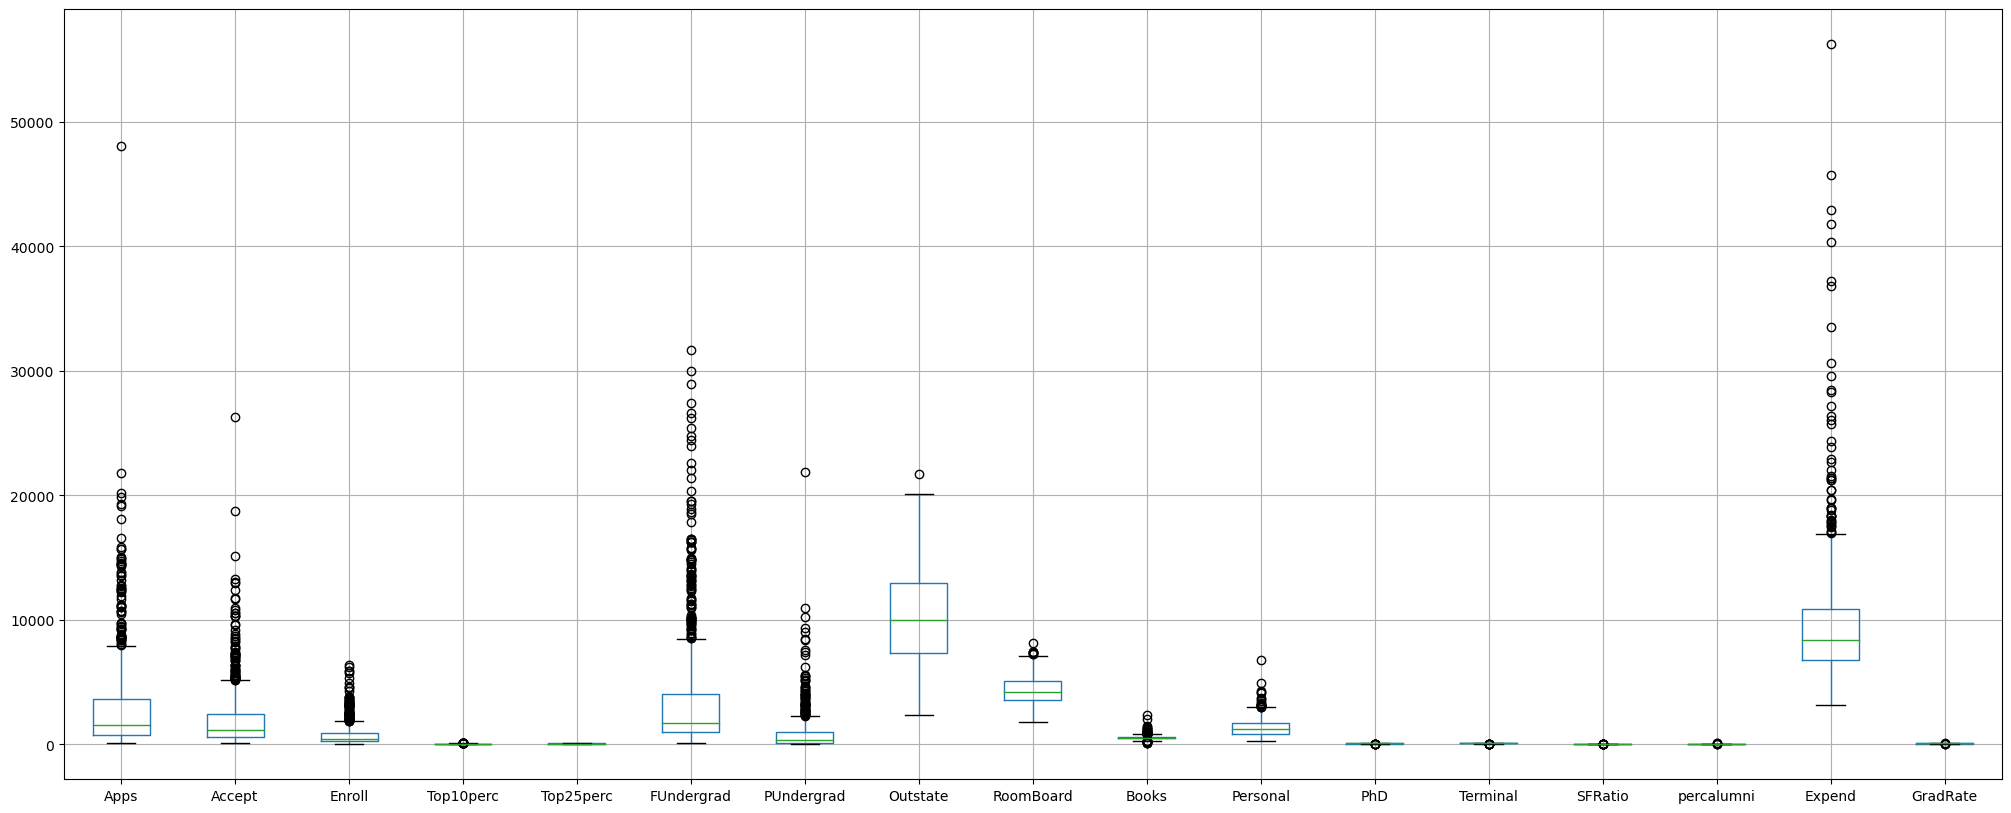

In [51]:
df_edu.boxplot(figsize=(25,10));


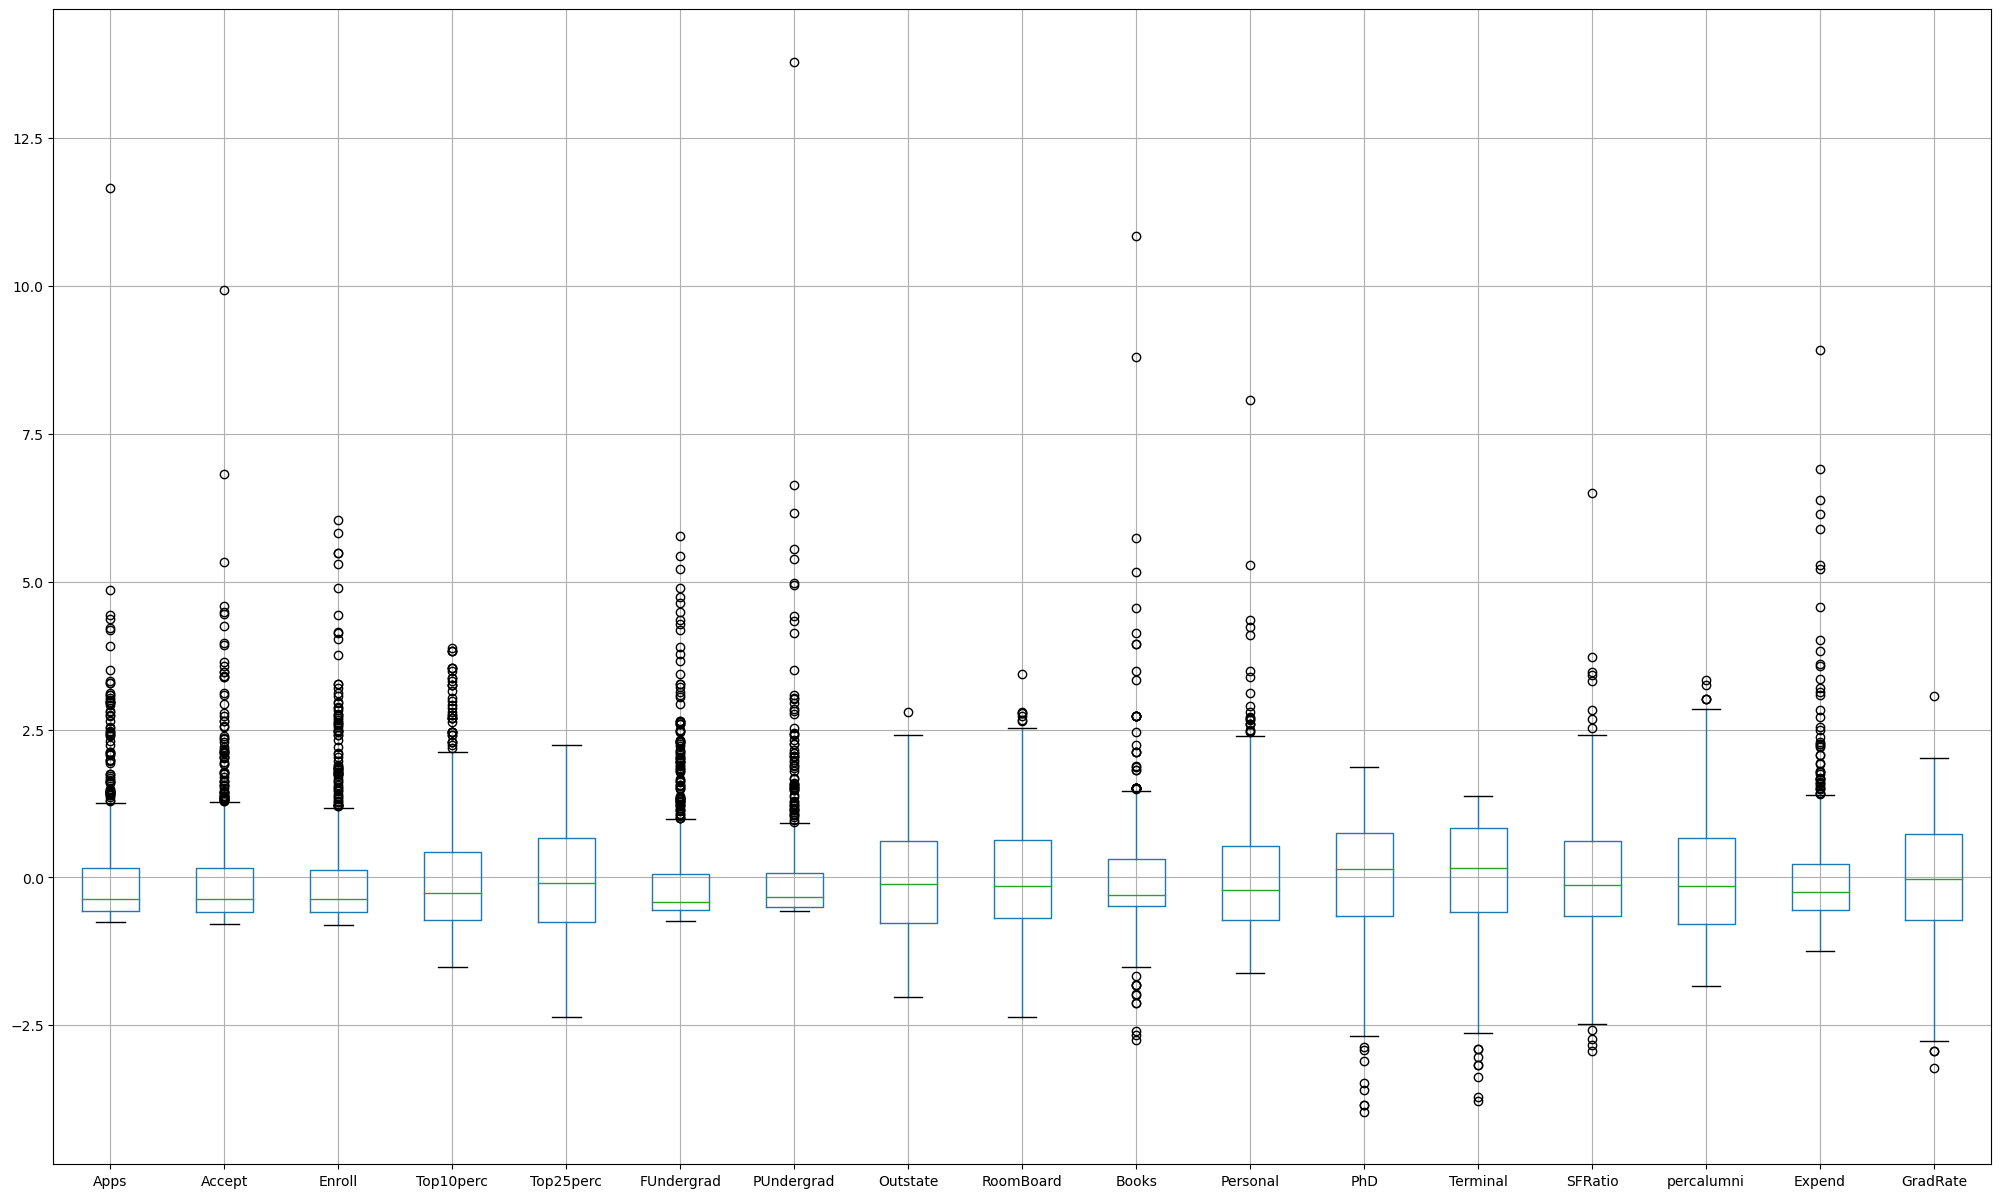

In [52]:
df_edu_scaled.boxplot(figsize=(25,15));


There are outliers in the box plot before scaling the data. After scaling the data, outliers are still present.

Scaling did not remove outliers. Scaling scales the values on a z-score distribution.

Here, we can wish to treat outliers too. If we wish to treat outliers, we can take 3 standard deviations as outliers or impute them with IQR values
 


### 5. Extract the eigenvalues and eigenvectors.


In [53]:
from statsmodels.multivariate.pca import PCA

pc = PCA(df_edu_scaled,
         standardize=True,  
         normalize=True,    
         missing=None,
         method='eig')
eig_vecs = pc.eigenvecs
eig_vecs

eigenvec_00  eigenvec_01  eigenvec_02  eigenvec_03  eigenvec_04  \
0     -0.248766     0.331598    -0.063092     0.281311     0.005741   
1     -0.207602     0.372117    -0.101249     0.267817     0.055786   
2     -0.176304     0.403724    -0.082986     0.161827    -0.055694   
3     -0.354274    -0.082412     0.035056    -0.051547    -0.395434   
4     -0.344001    -0.044779    -0.024148    -0.109767    -0.426534   
5     -0.154641     0.417674    -0.061393     0.100412    -0.043454   
6     -0.026443     0.315088     0.139682    -0.158558     0.302385   
7     -0.294736    -0.249644     0.046599     0.131291     0.222532   
8     -0.249030    -0.137809     0.148967     0.184996     0.560919   
9     -0.064758     0.056342     0.677412     0.087089    -0.127289   
10     0.042529     0.219929     0.499721    -0.230711    -0.222311   
11    -0.318313     0.058311    -0.127028    -0.534725     0.140166   
12    -0.317056     0.046429    -0.066038    -0.519443     0.204720   
13     0.176958     0.246665    -0.289848    -0.161189    -0.079388   
14    -0.205082    -0.246595    -0.146989     0.017314    -0.216297   
15    -0.318909    -0.131690     0.226744     0.079273     0.075958   
16    -0.252316    -0.169241    -0.208065     0.269129    -0.109268   

    eigenvec_05  eigenvec_06  eigenvec_07  eigenvec_08  eigenvec_09  \
0     -0.016237     0.042486    -0.103090     0.090227    -0.052510   
1      0.007535     0.012950    -0.056271     0.177865    -0.041140   
2     -0.042558     0.027693     0.058662     0.128561    -0.034488   
3     -0.052693     0.161332    -0.122678    -0.341100    -0.064026   
4      0.033092     0.118486    -0.102492    -0.403712    -0.014549   
5     -0.043454     0.025076     0.078890     0.059442    -0.020847   
6     -0.191199    -0.061042     0.570784    -0.560673     0.223106   
7     -0.030000    -0.108529     0.009846     0.004573    -0.186675   
8      0.162755    -0.209744    -0.221453    -0.275023    -0.298324   
9      0.641055     0.149692     0.213293     0.133663     0.082029   
10    -0.331398    -0.633790    -0.232661     0.094469    -0.136028   
11     0.091256     0.001096    -0.077040     0.185182     0.123452   
12     0.154928     0.028477    -0.012161     0.254938     0.088578   
13     0.487046    -0.219259    -0.083605    -0.274544    -0.472045   
14    -0.047340    -0.243321     0.678524     0.255335    -0.423000   
15    -0.298119     0.226584    -0.054159     0.049139    -0.132286   
16     0.216163    -0.559944    -0.005336    -0.041904     0.590271   

    eigenvec_10  eigenvec_11  eigenvec_12  eigenvec_13  eigenvec_14  \
0     -0.043046    -0.024071     0.595831    -0.080633    -0.133406   
1      0.058406     0.145102     0.292642    -0.033467     0.145498   
2      0.069399    -0.011143    -0.444638     0.085697    -0.029590   
3      0.008105    -0.038554     0.001023     0.107828    -0.697723   
4      0.273128     0.089352     0.021884    -0.151742     0.617275   
5      0.081158    -0.056177    -0.523622     0.056373    -0.009916   
6     -0.100693     0.063536     0.125998    -0.019286    -0.020952   
7     -0.143221     0.823444    -0.141856     0.034012    -0.038354   
8      0.359322    -0.354560    -0.069749     0.058429    -0.003402   
9     -0.031940     0.028159     0.011438     0.066849     0.009439   
10     0.018578     0.039264     0.039455    -0.027529     0.003090   
11    -0.040372    -0.023222     0.127696     0.691126     0.112056   
12     0.058973    -0.016485    -0.058313    -0.671009    -0.158910   
13    -0.445001     0.011026    -0.017715    -0.041374     0.020899   
14     0.130728    -0.182661     0.104088     0.027154     0.008418   
15    -0.692089    -0.325982    -0.093746    -0.073123     0.227742   
16    -0.219839    -0.122107    -0.069197    -0.036477     0.003394   

    eigenvec_15  eigenvec_16  
0      0.459139    -0.358970  
1     -0.518569     0.543427  
2     -0.404318    -0.609651  
3     -0.148739     0.144986  
4      0.051

In [54]:
eig_vals= np.linalg.eigvals(cov_matrix)
eig_vals

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.02302787, 0.03672545, 0.31344588, 0.08802464, 0.1439785 ,
       0.16779415, 0.22061096])

### 6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [55]:
# Step 1
# Scaling

from scipy.stats import zscore
df_edu_scaled = df_edu_dropped.apply(zscore)
print('Data after scaling')
df_edu_scaled.head()

Data after scaling


Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827   -0.168116   -0.209207   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911   -0.209788    0.244307   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878   -0.549565   -0.497090   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612   -0.658079   -0.520752   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031   -0.711924    0.009005   

   Outstate  RoomBoard     Books  Personal       PhD  Terminal   SFRatio  \
0 -0.746356  -0.964905 -0.602312  1.270045 -0.163028 -0.115729  1.013776   
1  0.457496   1.909208  1.215880  0.235515 -2.675646 -3.378176 -0.477704   
2  0.201305  -0.554317 -0.905344 -0.259582 -1.204845 -0.931341 -0.300749   
3  0.626633   0.996791 -0.602312 -0.688173  1.185206  1.175657 -1.615274   
4 -0.716508  -0.216723  1.518912  0.235515  0.204672 -0.523535 -0.553542   

   percalumni    Expend  GradRate  
0   -0.867574 -0.501910 -0.318252  
1   -0.544572  0.166110 -0.551262  
2    0.585935 -0.177290 -0.667767  
3    1.151188  1.792851 -0.376504  
4   -1.675079  0.241803 -2.939613

In [56]:
# Step 2

cov_matrix = np.cov(df_edu_scaled.T)
print('Covariance Matrix \n')
cov_matrix

Covariance Matrix 



array([[ 1.00128866,  0.94466636,  0.84791332,  0.33927032,  0.35209304,
         0.81554018,  0.3987775 ,  0.05022367,  0.16515151,  0.13272942,
         0.17896117,  0.39120081,  0.36996762,  0.09575627, -0.09034216,
         0.2599265 ,  0.14694372],
       [ 0.94466636,  1.00128866,  0.91281145,  0.19269493,  0.24779465,
         0.87534985,  0.44183938, -0.02578774,  0.09101577,  0.11367165,
         0.20124767,  0.35621633,  0.3380184 ,  0.17645611, -0.16019604,
         0.12487773,  0.06739929],
       [ 0.84791332,  0.91281145,  1.00128866,  0.18152715,  0.2270373 ,
         0.96588274,  0.51372977, -0.1556777 , -0.04028353,  0.11285614,
         0.28129148,  0.33189629,  0.30867133,  0.23757707, -0.18102711,
         0.06425192, -0.02236983],
       [ 0.33927032,  0.19269493,  0.18152715,  1.00128866,  0.89314445,
         0.1414708 , -0.10549205,  0.5630552 ,  0.37195909,  0.1190116 ,
        -0.09343665,  0.53251337,  0.49176793, -0.38537048,  0.45607223,
         0.6617651 

In [57]:
# output is similar to correlation matrix
df_edu_scaled.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  \
Apps        1.001289  0.944666  0.847913   0.339270   0.352093    0.815540   
Accept      0.944666  1.001289  0.912811   0.192695   0.247795    0.875350   
Enroll      0.847913  0.912811  1.001289   0.181527   0.227037    0.965883   
Top10perc   0.339270  0.192695  0.181527   1.001289   0.893144    0.141471   
Top25perc   0.352093  0.247795  0.227037   0.893144   1.001289    0.199702   
FUndergrad  0.815540  0.875350  0.965883   0.141471   0.199702    1.001289   
PUndergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646    0.571247   
Outstate    0.050224 -0.025788 -0.155678   0.563055   0.490024   -0.216020   
RoomBoard   0.165152  0.091016 -0.040284   0.371959   0.331917   -0.068979   
Books       0.132729  0.113672  0.112856   0.119012   0.115676    0.115699   
Personal    0.178961  0.201248  0.281291  -0.093437  -0.080914    0.317608   
PhD         0.391201  0.356216  0.331896   0.532513   0.546566    0.318747   
Terminal    0.369968  0.338018  0.308671   0.491768   0.525425    0.300406   
SFRatio     0.095756  0.176456  0.237577  -0.385370  -0.295009    0.280064   
percalumni -0.090342 -0.160196 -0.181027   0.456072   0.418403   -0.229758   
Expend      0.259927  0.124878  0.064252   0.661765   0.528127    0.018676   
GradRate    0.146944  0.067399 -0.022370   0.495627   0.477896   -0.078875   

            PUndergrad  Outstate  RoomBoard     Books  Personal       PhD  \
Apps          0.398777  0.050224   0.165152  0.132729  0.178961  0.391201   
Accept        0.441839 -0.025788   0.091016  0.113672  0.201248  0.356216   
Enroll        0.513730 -0.155678  -0.040284  0.112856  0.281291  0.331896   
Top10perc    -0.105492  0.563055   0.371959  0.119012 -0.093437  0.532513   
Top25perc    -0.053646  0.490024   0.331917  0.115676 -0.080914  0.546566   
FUndergrad    0.571247 -0.216020  -0.068979  0.115699  0.317608  0.318747   
PUndergrad    1.001289 -0.253839  -0.061405  0.081304  0.320294  0.149306   
Outstate     -0.253839  1.001289   0.655100  0.038905 -0.299472  0.383476   
RoomBoard    -0.061405  0.655100   1.001289  0.128128 -0.199685  0.329627   
Books         0.081304  0.038905   0.128128  1.001289  0.179526  0.026940   
Personal      0.320294 -0.299472  -0.199685  0.179526  1.001289 -0.010950   
PhD           0.149306  0.383476   0.329627  0.026940 -0.010950  1.001289   
Terminal      0.142086  0.408509   0.375022  0.100084 -0.030653  0.850682   
SFRatio       0.232830 -0.555536  -0.363095 -0.031970  0.136521 -0.130698   
percalumni   -0.281154  0.566992   0.272714 -0.040260 -0.286337  0.249330   
Expend       -0.083676  0.673646   0.502386  0.112554 -0.098018  0.433319   
GradRate     -0.257332  0.572026   0.425489  0.001062 -0.269691  0.305431   

            Terminal   SFRatio  percalumni    Expend  GradRate  
Apps        0.369968  0.095756   -0.090342  0.259927  0.146944  
Accept      0.338018  0.176456   -0.160196  0.124878  0.067399  
Enroll      0.308671  0.237577   -0.181027  0.064252 -0.022370  
Top10perc   0.491768 -0.385370    0.456072  0.661765  0.495627  
Top25perc   0.525425 -0.295009    0.418403  0.528127  0.477896  
FUndergrad  0.300406  0.280064   -0.229758  0.018676 -0.078875  
PUndergrad  0.142086  0.232830   -0.281154 -0.083676 -0.257332  
Outstate    0.408509 -0.555536    0.566992  0.673646  0.572026  
RoomBoard   0.375022 -0.363095    0.272714  0.502386  0.425489  
Books       0.100084 -0.031970   -0.040260  0.112554  0.001062  
Personal   -0.030653  0.136521   -0.286337 -0.098018 -0.269691  
PhD         0.850682 -0.130698    0.249330  0.433319  0.305431  
Terminal    1.001289 -0.160310    0.267475  0.439365  0.289900  
SFRatio    -0.160310  1.001289   -0.403448 -0.584584 -0.307106  
percalumni  0.267475 -0.403448    1.001289  0.418250  0.491530  
Expend      0.439365 -0.584584    0.418250  1.001289  0.390846  
GradRate    0.289900 -0.307106    0.491530  0.390846  1.001289

In [58]:
# Step 3

from statsmodels.multivariate.pca import PCA

pc = PCA(df_edu_scaled,
         standardize=True,  
         normalize=True,    
         missing=None,
         method='eig')

In [59]:
eig_vecs = pc.eigenvecs

In [60]:
print('Eigen Vectors \n')
eig_vecs

Eigen Vectors 



eigenvec_00  eigenvec_01  eigenvec_02  eigenvec_03  eigenvec_04  \
0     -0.248766     0.331598    -0.063092     0.281311     0.005741   
1     -0.207602     0.372117    -0.101249     0.267817     0.055786   
2     -0.176304     0.403724    -0.082986     0.161827    -0.055694   
3     -0.354274    -0.082412     0.035056    -0.051547    -0.395434   
4     -0.344001    -0.044779    -0.024148    -0.109767    -0.426534   
5     -0.154641     0.417674    -0.061393     0.100412    -0.043454   
6     -0.026443     0.315088     0.139682    -0.158558     0.302385   
7     -0.294736    -0.249644     0.046599     0.131291     0.222532   
8     -0.249030    -0.137809     0.148967     0.184996     0.560919   
9     -0.064758     0.056342     0.677412     0.087089    -0.127289   
10     0.042529     0.219929     0.499721    -0.230711    -0.222311   
11    -0.318313     0.058311    -0.127028    -0.534725     0.140166   
12    -0.317056     0.046429    -0.066038    -0.519443     0.204720   
13     0.176958     0.246665    -0.289848    -0.161189    -0.079388   
14    -0.205082    -0.246595    -0.146989     0.017314    -0.216297   
15    -0.318909    -0.131690     0.226744     0.079273     0.075958   
16    -0.252316    -0.169241    -0.208065     0.269129    -0.109268   

    eigenvec_05  eigenvec_06  eigenvec_07  eigenvec_08  eigenvec_09  \
0     -0.016237     0.042486    -0.103090     0.090227    -0.052510   
1      0.007535     0.012950    -0.056271     0.177865    -0.041140   
2     -0.042558     0.027693     0.058662     0.128561    -0.034488   
3     -0.052693     0.161332    -0.122678    -0.341100    -0.064026   
4      0.033092     0.118486    -0.102492    -0.403712    -0.014549   
5     -0.043454     0.025076     0.078890     0.059442    -0.020847   
6     -0.191199    -0.061042     0.570784    -0.560673     0.223106   
7     -0.030000    -0.108529     0.009846     0.004573    -0.186675   
8      0.162755    -0.209744    -0.221453    -0.275023    -0.298324   
9      0.641055     0.149692     0.213293     0.133663     0.082029   
10    -0.331398    -0.633790    -0.232661     0.094469    -0.136028   
11     0.091256     0.001096    -0.077040     0.185182     0.123452   
12     0.154928     0.028477    -0.012161     0.254938     0.088578   
13     0.487046    -0.219259    -0.083605    -0.274544    -0.472045   
14    -0.047340    -0.243321     0.678524     0.255335    -0.423000   
15    -0.298119     0.226584    -0.054159     0.049139    -0.132286   
16     0.216163    -0.559944    -0.005336    -0.041904     0.590271   

    eigenvec_10  eigenvec_11  eigenvec_12  eigenvec_13  eigenvec_14  \
0     -0.043046    -0.024071     0.595831    -0.080633    -0.133406   
1      0.058406     0.145102     0.292642    -0.033467     0.145498   
2      0.069399    -0.011143    -0.444638     0.085697    -0.029590   
3      0.008105    -0.038554     0.001023     0.107828    -0.697723   
4      0.273128     0.089352     0.021884    -0.151742     0.617275   
5      0.081158    -0.056177    -0.523622     0.056373    -0.009916   
6     -0.100693     0.063536     0.125998    -0.019286    -0.020952   
7     -0.143221     0.823444    -0.141856     0.034012    -0.038354   
8      0.359322    -0.354560    -0.069749     0.058429    -0.003402   
9     -0.031940     0.028159     0.011438     0.066849     0.009439   
10     0.018578     0.039264     0.039455    -0.027529     0.003090   
11    -0.040372    -0.023222     0.127696     0.691126     0.112056   
12     0.058973    -0.016485    -0.058313    -0.671009    -0.158910   
13    -0.445001     0.011026    -0.017715    -0.041374     0.020899   
14     0.130728    -0.182661     0.104088     0.027154     0.008418   
15    -0.692089    -0.325982    -0.093746    -0.073123     0.227742   
16    -0.219839    -0.122107    -0.069197    -0.036477     0.003394   

    eigenvec_15  eigenvec_16  
0      0.459139    -0.358970  
1     -0.518569     0.543427  
2     -0.404318    -0.609651  
3     -0.148739     0.144986  
4      0.051

In [61]:
eig_vals= np.linalg.eigvals(cov_matrix)
print('eigen values')
eig_vals

eigen values


array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.02302787, 0.03672545, 0.31344588, 0.08802464, 0.1439785 ,
       0.16779415, 0.22061096])

In [62]:
# Step 4

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is \n')
var_exp

The variance explained by each of eigen values in order is 



[32.020628198869154,
 26.340214436112475,
 6.900916554222497,
 5.922989222926293,
 5.488405110358477,
 4.984700954557438,
 3.558871491746656,
 3.4536213369992614,
 3.117233679821719,
 2.3751915258937997,
 1.8414263209386863,
 1.2960414001235359,
 0.9857541228001192,
 0.8458423350830047,
 0.5171255833731966,
 0.2157540100727587,
 0.13528371610095272]

In [63]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained \n")

cum_var_exp

Cumulative Variance Explained 



array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

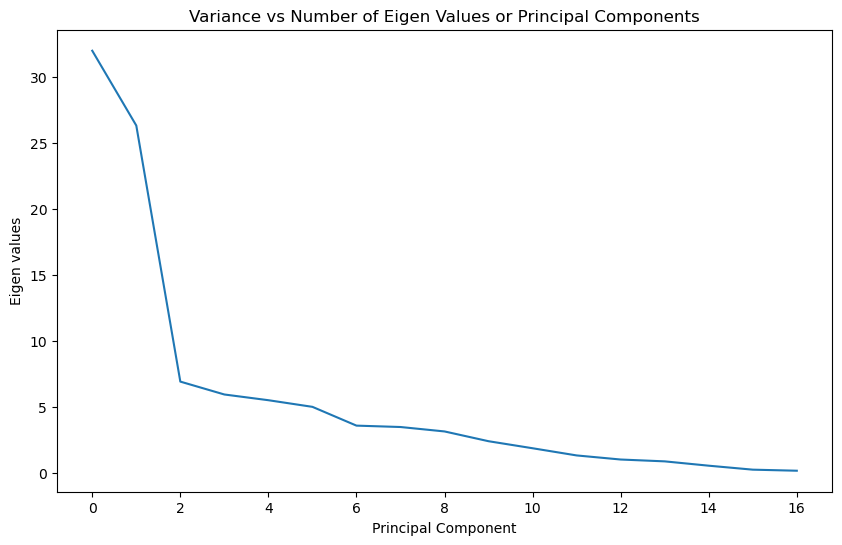

In [64]:
# Step 5

plt.figure(figsize=(10,6))
plt.plot(var_exp)
plt.title('Variance vs Number of Eigen Values or Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigen values');


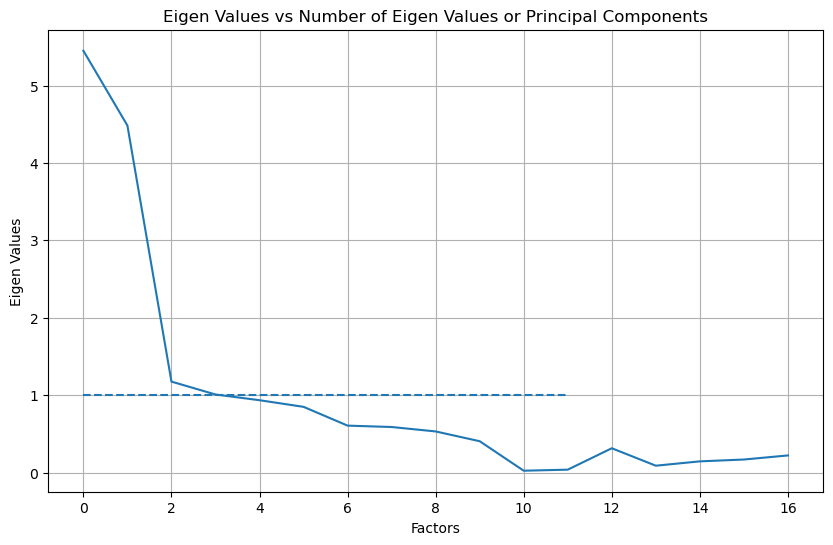

In [65]:
plt.figure(figsize=(10,6))
plt.plot(eig_vals)
plt.grid()
plt.ylabel('Eigen Values')
plt.xlabel('Factors')
plt.hlines(y=1,xmin=0,xmax=11,linestyles='dashed')
plt.title('Eigen Values vs Number of Eigen Values or Principal Components');

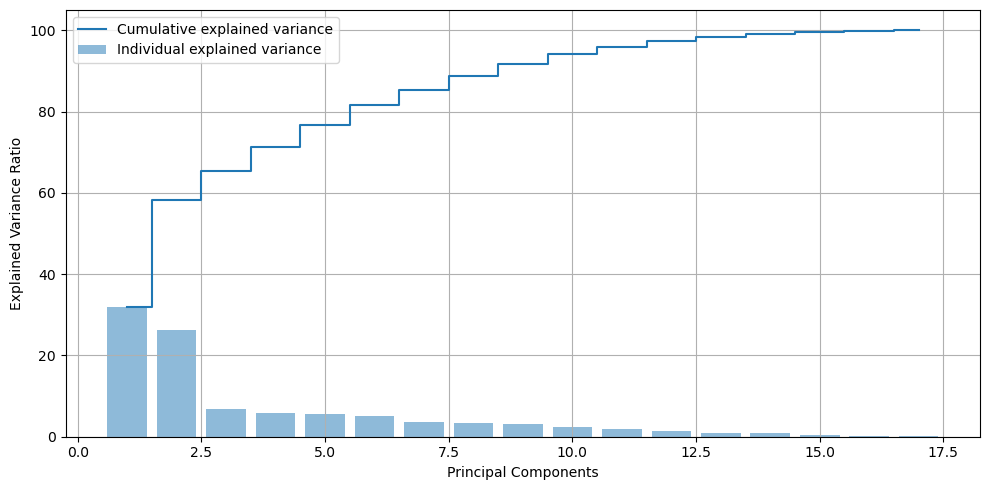

In [66]:
#Let us now plot one more graph with both the variance explained by each eigen value & cumulative variance explained.

plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.grid()
plt.show()

In [67]:
#Step 6
#Calculating the Principal Components

from statsmodels.multivariate.pca import PCA

pc = PCA(df_edu_dropped,
         standardize=True,  
         normalize=False,    
         missing=None,method='eig')

In [68]:
df_comp = pc.loadings
df_comp

comp_00   comp_01   comp_02   comp_03   comp_04   comp_05  \
Apps       -0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept     -0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll     -0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc  -0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc  -0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
FUndergrad -0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
PUndergrad -0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate   -0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
RoomBoard  -0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books      -0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD        -0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal   -0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
SFRatio     0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
percalumni -0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend     -0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
GradRate   -0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

             comp_06   comp_07   comp_08   comp_09   comp_10   comp_11  \
Apps        0.042486 -0.103090  0.090227 -0.052510 -0.043046 -0.024071   
Accept      0.012950 -0.056271  0.177865 -0.041140  0.058406  0.145102   
Enroll      0.027693  0.058662  0.128561 -0.034488  0.069399 -0.011143   
Top10perc   0.161332 -0.122678 -0.341100 -0.064026  0.008105 -0.038554   
Top25perc   0.118486 -0.102492 -0.403712 -0.014549  0.273128  0.089352   
FUndergrad  0.025076  0.078890  0.059442 -0.020847  0.081158 -0.056177   
PUndergrad -0.061042  0.570784 -0.560673  0.223106 -0.100693  0.063536   
Outstate   -0.108529  0.009846  0.004573 -0.186675 -0.143221  0.823444   
RoomBoard  -0.209744 -0.221453 -0.275023 -0.298324  0.359322 -0.354560   
Books       0.149692  0.213293  0.133663  0.082029 -0.031940  0.028159   
Personal   -0.633790 -0.232661  0.094469 -0.136028  0.018578  0.039264   
PhD         0.001096 -0.077040  0.185182  0.123452 -0.040372 -0.023222   
Terminal    0.028477 -0.012161  0.254938  0.088578  0.058973 -0.016485   
SFRatio    -0.219259 -0.083605 -0.274544 -0.472045 -0.445001  0.011026   
percalumni -0.243321  0.678524  0.255335 -0.423000  0.130728 -0.182661   
Expend      0.226584 -0.054159  0.049139 -0.132286 -0.692089 -0.325982   
GradRate   -0.559944 -0.005336 -0.041904  0.590271 -0.219839 -0.122107   

             comp_12   comp_13   comp_14   comp_15   comp_16  
Apps        0.595831 -0.080633 -0.133406  0.459139 -0.358970  
Accept      0.292642 -0.033467  0.145498 -0.518569  0.543427  
Enroll     -0.444638  0.085697 -0.029590 -0.404318 -0.609651  
Top10perc   0.001023  0.107828 -0.697723 -0.148739  0.144986  
Top25perc   0.021884 -0.151742  0.617275  0.051868 -0.080348  
FUndergrad -0.523622  0.056373 -0.009916  0.560363  0.414705  
PUndergrad  0.125998 -0.019286 -0.020952 -0.052731 -0.009018  
Outstate   -0.141856  0.034012 -0.038354  0.101595 -0.050900  
RoomBoard  -0.069749  0.058429 -0.003402 -0.025929 -0.001146  
Books       0.011438  0.066849  0.009439  0.002883 -0.000773  
Personal    0.039455 -0.027529  0.003090 -0.012890  0.001114  
PhD         0.127696  0.691126  0.112056  0.029808 -0.013813  
Terminal   -0.058313 -0.671009 -0.158910 -0.027076 -0.006209  
SFRatio    -0.017715 -0.041374  0.020899 -0.021248  0.002222  
percalumni  0.104088  0.027154  0.008418  0.003334  0.019187  
Expend     -0.093746 -0.073123  0.227742 -0.043880  0.035310  
GradRate   -0.069197 -0.036477  0.003394 -0.005008  0.013071

In [69]:
X_reduced = pc.factors
X_reduced.head()

comp_00   comp_01   comp_02   comp_03   comp_04   comp_05   comp_06  \
0  1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306 -0.638443   
1  2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137 -0.236753   
2  1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592  0.248276   
3 -2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508  1.249356   
4  2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918  2.159220   

    comp_07   comp_08   comp_09   comp_10   comp_11   comp_12   comp_13  \
0 -0.879386 -0.093084 -0.048593 -0.399747  0.089690 -0.052098 -0.180140   
1  0.046925 -1.113780 -0.965154  0.212509 -0.097239 -0.243518  0.744204   
2  0.308740  0.105452 -0.640660  0.154993  0.344731  0.097551 -0.227527   
3 -0.147694 -0.378997 -0.461244  0.420651 -0.687143 -0.075461  0.003380   
4 -0.624413  0.160383 -0.363428  0.153339  0.050552  0.267207  0.614409   

    comp_14   comp_15   comp_16  
0 -0.001752 -0.093140 -0.093552  
1 -0.103710 -0.050256  0.174057  
2  0.022558 -0.004053 -0.003759  
3  0.073181 -0.191546  0.175254  
4  0.273993  0.010653 -0.048344

In [70]:
X_reduced.shape

(777, 17)

### 7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]


In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=17)
df_edu_ex = pca.fit_transform(df_edu_scaled)

In [72]:
#eigen values

print('Eigen Values')
pca.explained_variance_


Eigen Values


array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [73]:
#eigen vectors

print('Eigen Vectors')
pca.components_


Eigen Vectors


array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [74]:
#all the columns in the dataset

df_edu_scaled.columns


Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'FUndergrad',
       'PUndergrad', 'Outstate', 'RoomBoard', 'Books', 'Personal', 'PhD',
       'Terminal', 'SFRatio', 'percalumni', 'Expend', 'GradRate'],
      dtype='object')

In [75]:
print('The Linear equation of 1st principal component: ')
for i in range(0,df_edu_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_edu_scaled.columns[i]),end=' + ')

The Linear equation of 1st principal component: 
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * FUndergrad + 0.03 * PUndergrad + 0.29 * Outstate + 0.25 * RoomBoard + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * SFRatio + 0.21 * percalumni + 0.32 * Expend + 0.25 * GradRate + 

### 8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [76]:

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


Adding the Eigen Values, we get the sum as 100.

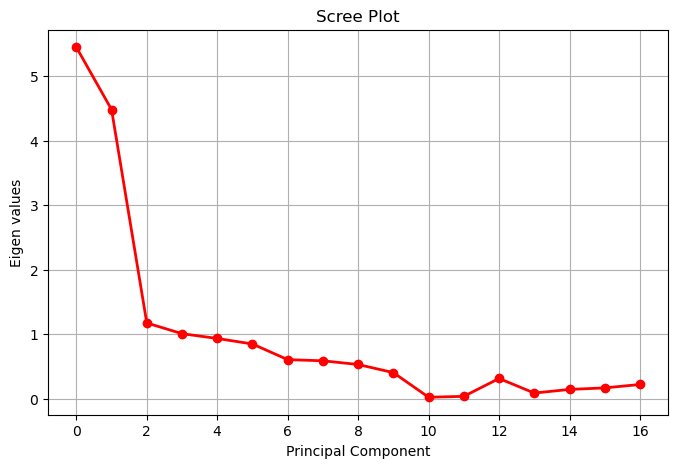

In [77]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(df_edu_scaled.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigen values')
plt.grid()
plt.show()

In [78]:
print('From the above plot, we can see that the number of components that we can probably take is 2.\n'
      'We also see that if we take 6 components the total amount of variance explained is',cum_var_exp[5],'%')

From the above plot, we can see that the number of components that we can probably take is 2.
We also see that if we take 6 components the total amount of variance explained is 81.65785447704633 %


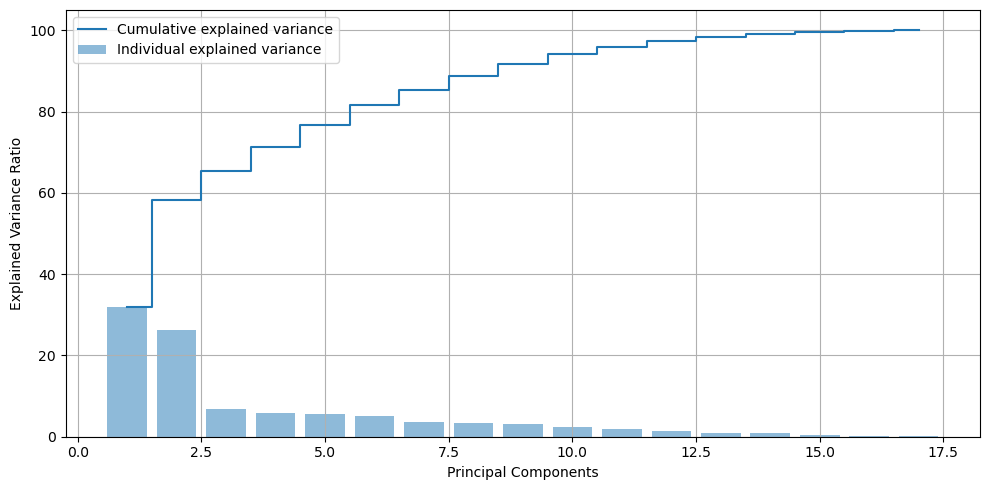

In [79]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.grid()
plt.show()

In [80]:
pca = PCA(n_components=6)
pca_new = pca.fit_transform(df_edu_scaled)

In [81]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309211, -0.10124905, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674399, -0.20806465],
       [ 0.28131055,  0.26781733,  0.16182676, -0.05154726, -0.10976654,
         0.10041235, -0.15855849,  0.13129137,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

The first components explain 32.02% variance in data

The first 2 components explains 58.36% variance in data

The first 3 components explains 65.26% variance in data

The first 4 components explains 71.18% variance in data

The first 5 components explains 76.67% variance in data

The Eigen vectors or PC for this case study is 6. We can see how much each variable contributes to the principal components. PCA reduces multicollinearity.


In [82]:
df_edu_comp = pd.DataFrame(pca.components_,columns=list(df_edu_scaled))
df_edu_comp

Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001    0.154641    0.026443   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779    0.417674    0.315088   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148   -0.061393    0.139682   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767    0.100412   -0.158558   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534   -0.043454    0.302385   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092   -0.043454   -0.191199   

   Outstate  RoomBoard     Books  Personal       PhD  Terminal   SFRatio  \
0  0.294736   0.249030  0.064758 -0.042529  0.318313  0.317056 -0.176958   
1 -0.249644  -0.137809  0.056342  0.219929  0.058311  0.046429  0.246665   
2  0.046599   0.148967  0.677412  0.499721 -0.127028 -0.066038 -0.289848   
3  0.131291   0.184996  0.087089 -0.230711 -0.534725 -0.519443 -0.161189   
4  0.222532   0.560919 -0.127289 -0.222311  0.140166  0.204720 -0.079388   
5 -0.030000   0.162755  0.641055 -0.331398  0.091256  0.154928  0.487046   

   percalumni    Expend  GradRate  
0    0.205082  0.318909  0.252316  
1   -0.246595 -0.131690 -0.169241  
2   -0.146989  0.226744 -0.208065  
3    0.017314  0.079273  0.269129  
4   -0.216297  0.075958 -0.109268  
5   -0.047340 -0.298119  0.216163

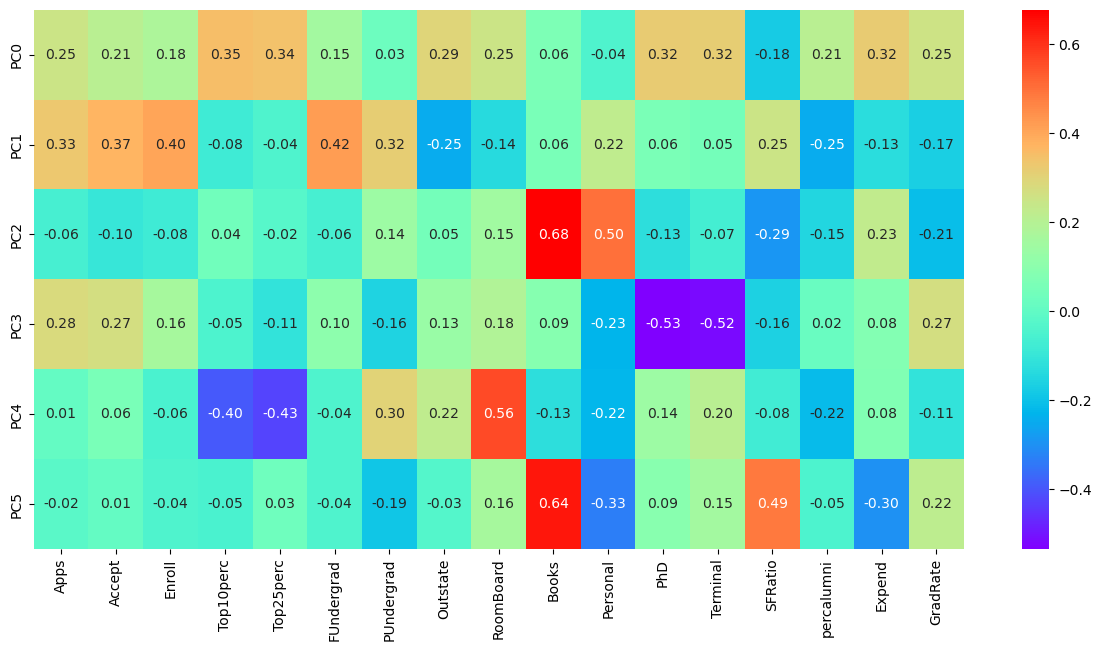

In [83]:
plt.figure(figsize= (15,7))
sns.heatmap(df_edu_comp, cmap= 'rainbow', annot = True, fmt = '.2f', yticklabels= ['PC0', 'PC1', 'PC2', 'PC3','PC4','PC5'])
plt.show()

### 9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]


This business case study is about education dataset which contain the names of various colleges, which has various details of colleges and university. To understand more about the dataset we perform univariate analysis and multivariate analysis which gives us the understanding about the variables. From analysis we can understand the distribution of the dataset, skew, and patterns in the dataset. From multivariate analysis we can understand the correlation of variables. Inference of multivariate analysis shows we can understand multiple variables highly correlated with each other. The scaling helps the dataset to standardize the variable in one scale. Outliers are imputed using IQR values once the values are imputed we can perform PCA. The principal component analysis is used reduce the multicollinearity between the variables. Depending on the variance of the dataset we can reduce the PCA components. The PCA components for this business case is 5 where we could understand the maximum variance of the dataset. Using the components we can now understand the reduced multicollinearity in the dataset